Problem Statement:

Which jobs are most at risk of automation by AI, and what factors influence this risk?

•	Predict: which jobs are at risk of automation using datasets like O*NET and others.

•	Output: Risk scores for various jobs, factors influencing automation.

Tasks:

•	Data collection: Gather data on job types, skills required, and current automation levels.

•	Exploratory Data Analysis: Analyze which factors (skills, education, industry) correlate with higher automation risk.

•	Predictive Modeling: Build a model to predict the automation risk for different job titles.

•	Visualization: Create dashboards or infographics showing which jobs are at risk and why.

In [3]:
# Step 1: Import Libraries & Load Data
import pandas as pd
import plotly.express as px
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Ashita SHARMA\Desktop\Datascience Project\datasets\automation 1.1.csv')
df.head()

Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515                       6342                  55.96   
1                 1243                       6205                  16.81   
2                 3338                       1154                  91.82   
3                 7173                       4060                   1.89   
4                 5944                       7396                  53.76   

   Automation Risk (%)   Location  Gender Diversity (%)  
0                28.28         UK                 44.63  
1                89.71        USA                 66.39  
2                72.97     Canada                 41.13  
3                99.94  Australia                 65.76  
4                37.65    Germany                 72.57

In [5]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64

In [6]:
print("Nunique")
print(df.nunique())          # ✅ method (needs ())


Nunique
Job Title                        639
Industry                           8
Job Status                         2
AI Impact Level                    3
Median Salary (USD)            29968
Required Education                 5
Experience Required (Years)       21
Job Openings (2024)             9439
Projected Openings (2030)       9410
Remote Work Ratio (%)           9466
Automation Risk (%)             9519
Location                           8
Gender Diversity (%)            5965
dtype: int64


In [7]:
print(df.shape)

(30000, 13)


In [8]:
print("\n--- Job Count by Required Education Level ---")
education_counts = df['Required Education'].value_counts()
print(education_counts)


--- Job Count by Required Education Level ---
Required Education
Bachelor’s Degree    6146
Master’s Degree      6097
Associate Degree     6003
High School          5900
PhD                  5854
Name: count, dtype: int64


In [9]:
# Get descriptive statistics for numerical columns
print("\n--- Statistics Summary ---")
df.describe()



--- Statistics Summary ---


Median Salary (USD)  Experience Required (Years)  Job Openings (2024)  \
count         30000.000000                 30000.000000         30000.000000   
mean          90119.965639                    10.051433          5039.640833   
std           34412.013953                     6.060678          2861.009654   
min           30001.860000                     0.000000           100.000000   
25%           60500.702500                     5.000000          2570.000000   
50%           90274.115000                    10.000000          5034.000000   
75%          119454.710000                    15.000000          7527.000000   
max          149998.500000                    20.000000         10000.000000   

       Projected Openings (2030)  Remote Work Ratio (%)  Automation Risk (%)  \
count               30000.000000           30000.000000         30000.000000   
mean                 5074.218100              49.836431            50.154229   
std                  2866.550722              28.966688            28.754889   
min                   100.000000               0.000000             0.000000   
25%                  2586.750000              24.570000            25.400000   
50%                  5106.500000              49.570000            50.020000   
75%                  7573.000000              75.100000            75.030000   
max                 10000.000000             100.000000            99.990000   

       Gender Diversity (%)  
count          30000.000000  
mean              49.979660  
std               17.274665  
min               20.000000  
25%               35.070000  
50%               49.885000  
75%               64.910000  
max               80.000000

In [10]:
# Check for missing values
print(df.isnull().sum())

Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64


In [11]:
# Check for duplicate rows
print(df.duplicated().sum())

0


In [12]:

# Dropping rows with missing values
df.dropna(inplace=True)

In [13]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

In [14]:
df.columns.tolist()

['Job Title',
 'Industry',
 'Job Status',
 'AI Impact Level',
 'Median Salary (USD)',
 'Required Education',
 'Experience Required (Years)',
 'Job Openings (2024)',
 'Projected Openings (2030)',
 'Remote Work Ratio (%)',
 'Automation Risk (%)',
 'Location',
 'Gender Diversity (%)']

In [15]:
df.nunique()

Job Title                        639
Industry                           8
Job Status                         2
AI Impact Level                    3
Median Salary (USD)            29968
Required Education                 5
Experience Required (Years)       21
Job Openings (2024)             9439
Projected Openings (2030)       9410
Remote Work Ratio (%)           9466
Automation Risk (%)             9519
Location                           8
Gender Diversity (%)            5965
dtype: int64

In [16]:
df.sum()

Job Title                      Investment analystJournalist, newspaperFinanci...
Industry                       ITManufacturingFinanceHealthcareITEducationMan...
Job Status                     IncreasingIncreasingIncreasingIncreasingIncrea...
AI Impact Level                ModerateModerateLowHighLowLowHighHighHighModer...
Median Salary (USD)                                                2703598969.16
Required Education             Master’s DegreeMaster’s DegreeBachelor’s Degre...
Experience Required (Years)                                               301543
Job Openings (2024)                                                    151189225
Projected Openings (2030)                                              152226543
Remote Work Ratio (%)                                                 1495092.94
Automation Risk (%)                                                   1504626.88
Location                       UKUSACanadaAustraliaGermanyUSAUKCanadaAustrali...
Gender Diversity (%)        

In [17]:
# Job title
job_title_counts = df["Job Title"].value_counts()

# Display each job title and its count
for title, count in job_title_counts.items():
    print(f"{title} = {count}")
    # Display total number of unique job titles
print("Total unique job titles:", job_title_counts.count())
print("Total sum of job titles:", job_title_counts.sum())
# ---------------------------
#  # 📊 Graph #
#  ---------------------------
# Reset index to convert Series into a DataFrame
job_title_df = job_title_counts.reset_index()
job_title_df.columns = ["Job Title", "Count"]

# Line graph
fig = px.line(job_title_df, y="Job Title", x="Count",
              title="Job Title Frequency",
              markers=True)  # markers=True to show points
fig.show()

Surveyor, insurance = 75
Counselling psychologist = 70
Charity officer = 68
Surveyor, land/geomatics = 67
Hydrogeologist = 66
Insurance claims handler = 65
Tax inspector = 64
Engineer, production = 64
International aid/development worker = 63
Television production assistant = 63
Contracting civil engineer = 62
Environmental education officer = 62
Horticultural therapist = 62
Quantity surveyor = 61
Administrator, sports = 61
Designer, television/film set = 61
Garment/textile technologist = 61
Marine scientist = 61
Sound technician, broadcasting/film/video = 61
Print production planner = 61
Air traffic controller = 61
Ceramics designer = 60
Armed forces training and education officer = 60
Telecommunications researcher = 60
Senior tax professional/tax inspector = 60
Journalist, magazine = 60
Product manager = 60
Therapist, nutritional = 60
Historic buildings inspector/conservation officer = 59
Psychotherapist = 59
Education administrator = 58
Sales professional, IT = 58
Petroleum engineer

In [18]:
# Count each industry
industry_counts = df["Industry"].value_counts()

# Total rows across all industries
total_rows = industry_counts.sum()

# Display each industry, its count, and percentage
for industry, count in industry_counts.items():
    percent = (count / total_rows) * 100
    print(f"{industry} = {count}  ({percent:.2f}%)")

# Totals
print("\nTotal unique industries:", industry_counts.count())
print("Total rows (all industries):", total_rows)
# ---------------------------
#  # 📊 Graph #
#  ---------------------------
industry_counts = df["Industry"].value_counts().reset_index()
industry_counts.columns = ["Industry", "Count"]

fig = px.pie(
    industry_counts,
    names="Industry",
    values="Count",
    title="Industry Distribution",
    hole=0.0,  # 🔹 set between 0 (full pie) and 1 (donut)
)

fig.update_traces(textinfo="percent+label")  # show % and label inside/outside

fig.show()

Entertainment = 3895  (12.98%)
Manufacturing = 3855  (12.85%)
Healthcare = 3771  (12.57%)
Finance = 3721  (12.40%)
Education = 3714  (12.38%)
Retail = 3702  (12.34%)
IT = 3681  (12.27%)
Transportation = 3661  (12.20%)

Total unique industries: 8
Total rows (all industries): 30000


In [19]:
# Counting Job Status
job_status_counts = df["Job Status"].value_counts()

# Display each job status and its count
for status, count in job_status_counts.items():
    print(f"{status} = {count}")

# Display total number of unique job statuses
print("Total unique job statuses:", job_status_counts.count())
print("Total sum of job statuses:", job_status_counts.sum())

job_status_df = job_status_counts.reset_index()
job_status_df.columns = ["Job Status", "Count"]
# ---------------------------
#  # 📊 Graph #
#  ---------------------------
# Bar chart
fig = px.bar(job_status_df, y="Job Status", x="Count",
             title="Job Status Distribution",
             text="Count")  # show counts on bars
fig.show()

Increasing = 15136
Decreasing = 14864
Total unique job statuses: 2
Total sum of job statuses: 30000


In [20]:
# counting Ai impact
ai_impact_counts = df["AI Impact Level"].value_counts()

# Display each AI impact and its count
for impact, count in ai_impact_counts.items():
    print(f"{impact} = {count}")
    # Display total number of unique AI impacts
print("Total unique AI impacts:", ai_impact_counts.count())
print("Total sum of AI impacts:", ai_impact_counts.sum())
# ---------------------------
#  # 📊 Graph #
#  ---------------------------
ai_impact_df = ai_impact_counts.reset_index()
ai_impact_df.columns = ["AI Impact Level", "Count"]

# Line chart
fig = px.line(ai_impact_df, x="AI Impact Level", y="Count",
              title="AI Impact Level Distribution",
              markers=True)  # markers=True to show data points
fig.show()

Moderate = 10042
High = 10005
Low = 9953
Total unique AI impacts: 3
Total sum of AI impacts: 30000


In [21]:
# Counting Median Salary (USD)
median_salary_counts = df["Median Salary (USD)"].value_counts()

# Display each median salary count
for salary, count in median_salary_counts.items():
    print(f"{salary} = {count}")

# Display total number of unique median salaries
print("Total unique median salaries:", median_salary_counts.count())

# Display total number of rows (sum of all counts)
print("Total rows:", median_salary_counts.sum())

# 💡 Gross total of all salary values (numerical sum of the column)
print("Gross total salary (USD):", df["Median Salary (USD)"].sum())
# ---------------------------
#  # 📊 Graph #
#  ---------------------------
median_salary_df = median_salary_counts.reset_index()
median_salary_df.columns = ["Median Salary (USD)", "Count"]

# Sort by salary for a logical flow (optional if salaries are numeric)
median_salary_df = median_salary_df.sort_values("Median Salary (USD)")

# Stream-like (area) chart
fig = px.area(median_salary_df,
              x="Median Salary (USD)",
              y="Count",
              title="Median Salary Distribution (Stream Chart Style)")
fig.show()

119301.98 = 2
139154.33 = 2
126634.05 = 2
77847.53 = 2
108901.43 = 2
59213.22 = 2
117711.88 = 2
40648.37 = 2
49693.9 = 2
149674.55 = 2
55639.94 = 2
119250.96 = 2
44159.55 = 2
78551.67 = 2
128406.45 = 2
52923.33 = 2
59324.16 = 2
82943.69 = 2
101962.53 = 2
122965.46 = 2
130237.82 = 2
128917.77 = 2
109282.35 = 2
140722.06 = 2
91690.6 = 2
117221.32 = 2
142478.74 = 2
39917.38 = 2
73920.93 = 2
133155.54 = 2
33841.64 = 2
109363.8 = 2
132298.57 = 1
143279.19 = 1
97576.13 = 1
60956.63 = 1
39123.32 = 1
147150.03 = 1
64245.48 = 1
72488.15 = 1
95840.3 = 1
54473.53 = 1
120658.92 = 1
47118.33 = 1
137167.72 = 1
131556.94 = 1
139369.95 = 1
90500.43 = 1
137894.14 = 1
141724.18 = 1
91899.8 = 1
37348.3 = 1
94189.06 = 1
137758.26 = 1
101768.6 = 1
41419.96 = 1
103614.78 = 1
100215.14 = 1
116362.27 = 1
57137.11 = 1
138621.89 = 1
93555.68 = 1
84725.49 = 1
47567.81 = 1
73569.16 = 1
129959.01 = 1
47042.08 = 1
132416.34 = 1
93324.07 = 1
118113.65 = 1
70981.81 = 1
77028.89 = 1
114672.3 = 1
50955.44 = 1
113064.81

In [22]:
# Required Education
required_education_counts = df["Required Education"].value_counts()

# Display each required education and its count
for education, count in required_education_counts.items():
    print(f"{education} = {count}")
    # Display total number of unique required education
print("Total unique required education:", required_education_counts.count())
print("Total sum of required education:", required_education_counts.sum())

required_education_df = required_education_counts.reset_index()
required_education_df.columns = ["Required Education", "Count"]
# ---------------------------
#  # 📊 Graph #
#  ---------------------------
# Radar (polar) chart
fig = px.line_polar(required_education_df,
                    r="Count",
                    theta="Required Education",
                    line_close=True,      # closes the radar shape
                    title="Required Education Distribution")
fig.show()

Bachelor’s Degree = 6146
Master’s Degree = 6097
Associate Degree = 6003
High School = 5900
PhD = 5854
Total unique required education: 5
Total sum of required education: 30000


In [23]:
# Experience Required (Years)
experience_required_counts = df["Experience Required (Years)"].value_counts()

# Display each experience required count
for experience, count in experience_required_counts.items():
    print(f"{experience} = {count}")
    # Display total number of unique experience required
print("Total unique experience required:", experience_required_counts.count())
print("Total sum of experience required:", experience_required_counts.sum())
# 💡 Gross total of all salary values (numerical sum of the column)
print("Gross Expreience Required:", df["Experience Required (Years)"].sum())

19 = 1476
8 = 1475
0 = 1469
16 = 1464
11 = 1453
13 = 1449
20 = 1448
15 = 1447
7 = 1446
18 = 1430
6 = 1428
10 = 1423
12 = 1419
14 = 1416
5 = 1416
17 = 1407
2 = 1403
1 = 1400
3 = 1391
9 = 1388
4 = 1352
Total unique experience required: 21
Total sum of experience required: 30000
Gross Expreience Required: 301543


In [24]:
# Job Openings (2024)
job_openings_counts = df["Job Openings (2024)"].value_counts()

# Display each job opening count
for openings, count in job_openings_counts.items():
    print(f"{openings} = {count}")
    # Display total number of unique experience required
print("Total unique Jop Opening:", job_openings_counts.count())
print("Total sum of Jon Opening:", job_openings_counts.sum())
# 💡 Gross total of all salary values (numerical sum of the column)
print("Gross job_openings_counts:", df["Job Openings (2024)"].sum())
# ---------------------------
#  # 📊 Graph #
#  ---------------------------
job_openings_df = job_openings_counts.reset_index()
job_openings_df.columns = ["Job Openings (2024)", "Count"]

# Sort for better line chart visualization
job_openings_df = job_openings_df.sort_values("Job Openings (2024)")

# Line chart
fig = px.line(job_openings_df,
              x="Job Openings (2024)",
              y="Count",
              title="Job Openings (2024) Distribution",
              markers=True,   # show points on the line
              labels={"Count": "Number of Jobs", "Job Openings (2024)": "Job Openings (2024)"})

fig.show()

6783 = 12
4256 = 12
3032 = 11
3883 = 10
2190 = 10
4685 = 10
5471 = 10
1233 = 10
6926 = 10
9811 = 10
8207 = 10
6343 = 10
2855 = 10
3585 = 9
2129 = 9
8789 = 9
3978 = 9
5541 = 9
8490 = 9
7462 = 9
8256 = 9
3162 = 9
2053 = 9
6534 = 9
9352 = 9
6279 = 9
4343 = 9
6592 = 9
6774 = 9
3006 = 9
8688 = 9
1637 = 9
5856 = 9
1303 = 9
4544 = 9
9708 = 9
6060 = 9
7927 = 9
5953 = 9
9023 = 9
7311 = 9
8928 = 9
8021 = 9
3421 = 9
3207 = 8
6283 = 8
1294 = 8
4045 = 8
5893 = 8
5919 = 8
1473 = 8
8873 = 8
5404 = 8
2195 = 8
9153 = 8
2109 = 8
1219 = 8
385 = 8
6032 = 8
9193 = 8
2647 = 8
9789 = 8
5845 = 8
7574 = 8
4392 = 8
2387 = 8
9025 = 8
5702 = 8
1033 = 8
144 = 8
4527 = 8
6586 = 8
4456 = 8
5553 = 8
3347 = 8
9957 = 8
7610 = 8
7747 = 8
1058 = 8
9089 = 8
7408 = 8
2530 = 8
9749 = 8
3734 = 8
6808 = 8
7352 = 8
6616 = 8
5488 = 8
1454 = 8
7291 = 8
4627 = 8
5136 = 8
207 = 8
824 = 8
9837 = 8
3556 = 8
9910 = 8
9241 = 8
2341 = 8
1169 = 8
1623 = 8
762 = 8
1496 = 8
2649 = 8
2140 = 8
3645 = 8
5476 = 8
5590 = 8
3307 = 8
5788 = 8
29

In [25]:
# Projected Openings (2030)
project_openings_counts = df["Projected Openings (2030)"].value_counts()

# Display each job opening count
for openings, count in project_openings_counts.items():
    print(f"{openings} = {count}")
    # Display total number of unique experience required
print("Total unique Jop Opening:", project_openings_counts.count())
print("Total sum of Jon Opening:", project_openings_counts.sum())
# 💡 Gross total of job opening values (numerical sum of the column)
print("Gross job_openings_counts:", df["Projected Openings (2030)"].sum())
# ---------------------------
#  # 📊 Graph #
#  ---------------------------
project_openings_df = project_openings_counts.reset_index()
project_openings_df.columns = ["Projected Openings (2030)", "Count"]

# Scatter plot with size representing count
fig = px.scatter(project_openings_df,
                 x="Projected Openings (2030)",
                 y="Count",
                 size="Count",            # bubble size represents count
                 color="Count",           # color gradient by count
                 title="Projected Job Openings (2030)",
                 text="Count",
                 color_continuous_scale=px.colors.sequential.Viridis)

fig.update_traces(marker=dict(opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))

fig.show()

3587 = 10
1122 = 10
3272 = 10
6943 = 10
1426 = 10
3843 = 10
1427 = 10
5983 = 9
4619 = 9
4198 = 9
1686 = 9
6229 = 9
1571 = 9
5031 = 9
6885 = 9
410 = 9
6732 = 9
7595 = 9
8115 = 9
6884 = 9
4913 = 9
950 = 9
2747 = 9
7920 = 9
4893 = 9
6578 = 9
8256 = 9
9086 = 9
1062 = 9
5386 = 9
3015 = 9
6741 = 9
6097 = 9
7479 = 9
3932 = 9
5601 = 9
5136 = 9
6430 = 9
3970 = 9
4588 = 8
6232 = 8
8482 = 8
8051 = 8
6761 = 8
7788 = 8
681 = 8
7088 = 8
8702 = 8
6104 = 8
3655 = 8
3269 = 8
6221 = 8
4368 = 8
5148 = 8
528 = 8
4072 = 8
7969 = 8
2074 = 8
6574 = 8
5781 = 8
389 = 8
183 = 8
4499 = 8
6091 = 8
3666 = 8
5322 = 8
6532 = 8
3832 = 8
8253 = 8
7169 = 8
8753 = 8
7364 = 8
9096 = 8
7638 = 8
4237 = 8
2603 = 8
2300 = 8
568 = 8
1529 = 8
5484 = 8
665 = 8
6212 = 8
7796 = 8
6310 = 8
1931 = 8
2951 = 8
8416 = 8
7234 = 8
8611 = 8
8207 = 8
7103 = 8
2436 = 8
4669 = 8
7343 = 8
4070 = 8
1792 = 8
1648 = 8
1980 = 8
1242 = 8
6055 = 8
4207 = 8
9013 = 8
6296 = 8
6738 = 8
2385 = 8
1330 = 8
2458 = 8
1770 = 8
4112 = 8
9488 = 8
780 = 8
145

In [26]:
# Remote Work Ratio (%)
remote_work_counts = df["Remote Work Ratio (%)"].value_counts()

# Display each job opening count
for openings, count in remote_work_counts.items():
    print(f"{openings} = {count}")
    # Display total number of unique experience required
print("Total unique Jop Opening:", remote_work_counts.count())
print("Total sum of Jon Opening:", remote_work_counts.sum())
# 💡 Gross total of all salary values (numerical sum of the column)
print("Gross job_openings_counts:", df["Remote Work Ratio (%)"].sum())
# ---------------------------
#  # 📊 Graph #
#  ---------------------------
import plotly.express as px

remote_work_df = remote_work_counts.reset_index()
remote_work_df.columns = ["Remote Work Ratio (%)", "Count"]

# Dark-themed bar chart with blue bars
fig = px.bar(remote_work_df,
             x="Remote Work Ratio (%)",
             y="Count",
             title="Remote Work Ratio Distribution",
             text="Count",
             color="Count",  # keep color mapped to Count for gradient
             color_continuous_scale=px.colors.sequential.Blues)

# Dark background
fig.update_layout(
    template="plotly_dark",
    title_font=dict(size=20),
    xaxis_title="Remote Work Ratio (%)",
    yaxis_title="Count"
)

fig.show()


17.04 = 11
65.81 = 11
85.62 = 10
34.19 = 10
58.55 = 10
65.51 = 10
66.82 = 10
15.3 = 10
77.28 = 10
15.59 = 10
31.06 = 9
31.48 = 9
75.62 = 9
4.8 = 9
27.13 = 9
1.63 = 9
67.74 = 9
6.41 = 9
86.22 = 9
24.17 = 9
2.34 = 9
44.7 = 9
55.63 = 9
70.08 = 9
23.89 = 9
57.45 = 9
89.45 = 9
44.41 = 9
80.67 = 9
36.5 = 9
36.1 = 9
22.07 = 9
41.15 = 9
80.04 = 9
10.24 = 9
1.51 = 9
22.16 = 9
93.22 = 9
93.24 = 8
60.81 = 8
11.23 = 8
99.91 = 8
6.88 = 8
56.04 = 8
1.3 = 8
57.91 = 8
88.36 = 8
57.77 = 8
77.43 = 8
43.1 = 8
66.98 = 8
27.16 = 8
24.23 = 8
15.63 = 8
80.73 = 8
19.09 = 8
14.62 = 8
38.87 = 8
5.99 = 8
63.96 = 8
21.64 = 8
65.73 = 8
47.23 = 8
23.94 = 8
44.85 = 8
52.38 = 8
32.06 = 8
31.1 = 8
7.48 = 8
25.43 = 8
49.72 = 8
73.16 = 8
21.34 = 8
3.5 = 8
43.84 = 8
59.24 = 8
43.37 = 8
66.0 = 8
9.24 = 8
78.97 = 8
75.73 = 8
16.52 = 8
96.21 = 8
87.66 = 8
33.7 = 8
78.77 = 8
66.21 = 8
1.78 = 8
9.85 = 8
20.37 = 8
5.12 = 8
79.99 = 8
74.29 = 8
46.88 = 8
3.6 = 8
50.43 = 8
58.57 = 8
20.93 = 8
68.42 = 8
98.06 = 8
10.87 = 8
85.8 = 

In [27]:
# Automation Risk (%)
automation_risk_counts = df["Automation Risk (%)"].value_counts()

# Display each job opening count
for openings, count in automation_risk_counts.items():
    print(f"{openings} = {count}")
    # Display total number of unique experience required
print("Total unique Automation Risk:", automation_risk_counts.count())
print("Total sum of Automation Risk:", automation_risk_counts.sum())
# 💡 Gross total of all salary values (numerical sum of the column)
print("Gross Automation Risk(%):", df["Automation Risk (%)"].sum())
actual_risk = df["Automation Risk (%)"].mean()
print("Actual Automation Risk (%):", actual_risk)
# ---------------------------
#  # 📊 Graph #
#  ---------------------------
automation_risk_df = automation_risk_counts.reset_index()
automation_risk_df.columns = ["Automation Risk (%)", "Count"]

# Sort by risk percentage for proper area chart
automation_risk_df = automation_risk_df.sort_values("Automation Risk (%)")

# Simple area chart
fig = px.area(automation_risk_df,
              x="Automation Risk (%)",
              y="Count",
              title="Automation Risk (%) Distribution",
              labels={"Count": "Number of Jobs", "Automation Risk (%)": "Automation Risk (%)"})

fig.show()



78.62 = 12
53.3 = 11
11.56 = 10
96.16 = 10
43.42 = 10
57.86 = 10
32.85 = 10
59.2 = 10
5.01 = 10
60.19 = 10
20.18 = 10
56.13 = 10
10.75 = 10
28.95 = 9
36.94 = 9
94.24 = 9
1.74 = 9
83.72 = 9
58.52 = 9
78.18 = 9
13.8 = 9
36.35 = 9
63.28 = 9
56.91 = 9
23.28 = 9
17.77 = 9
96.98 = 9
43.49 = 9
10.83 = 9
41.42 = 9
0.44 = 9
28.84 = 9
85.74 = 9
11.57 = 9
1.61 = 9
61.4 = 9
50.77 = 9
40.39 = 9
39.59 = 8
79.31 = 8
12.88 = 8
24.43 = 8
82.65 = 8
72.0 = 8
32.28 = 8
97.36 = 8
16.53 = 8
82.6 = 8
33.02 = 8
4.84 = 8
39.8 = 8
61.83 = 8
51.69 = 8
98.03 = 8
32.74 = 8
22.75 = 8
19.55 = 8
58.01 = 8
83.83 = 8
79.75 = 8
56.36 = 8
73.1 = 8
46.96 = 8
61.08 = 8
15.75 = 8
32.62 = 8
79.35 = 8
29.61 = 8
20.94 = 8
99.86 = 8
46.19 = 8
99.57 = 8
24.47 = 8
6.33 = 8
74.09 = 8
66.26 = 8
59.23 = 8
80.01 = 8
82.11 = 8
44.71 = 8
39.65 = 8
11.79 = 8
9.09 = 8
73.07 = 8
71.96 = 8
71.49 = 8
89.8 = 8
50.07 = 8
20.76 = 8
19.13 = 8
53.11 = 8
5.03 = 8
13.75 = 8
81.81 = 8
4.88 = 8
93.9 = 8
71.16 = 8
98.8 = 8
30.05 = 8
79.88 = 8
69.61 =

In [28]:
# Location
# Count each country
country_counts = df["Location"].value_counts()

# Display each country and its count
for country, count in country_counts.items():
    print(f"{country} = {count}")

# Display total number of unique countries
print("Total unique countries:", country_counts.count())
print("Total sum of country:", country_counts.sum())
# ---------------------------
#  # 📊 Graph #
#  ---------------------------
# Convert Series to DataFrame
# Convert Series to DataFrame
country_df = country_counts.reset_index()
country_df.columns = ["Location", "Count"]

# Box plot
fig = px.box(country_df, y="Count", x="Location",
             title="Job Openings by Location (Box Plot)",
             points="all")  # show all individual points
fig.show()

Australia = 3802
UK = 3784
Canada = 3775
China = 3763
Germany = 3741
Brazil = 3728
USA = 3713
India = 3694
Total unique countries: 8
Total sum of country: 30000


In [29]:
# Gender Diversity (%)
gender_diversity_counts = df["Gender Diversity (%)"].value_counts()

# Display each job opening count
for openings, count in gender_diversity_counts.items():
    print(f"{openings} = {count}")
    # Display total number of unique experience required
print("Total unique Gender Diversity:", gender_diversity_counts.count())
print("Total sum of Gender Diversity:", gender_diversity_counts.sum())
# 💡 Gross total of Gender Diversity  (numerical sum of the column)
print("Gross Gender Diversity(%):", df["Gender Diversity (%)"].sum())
# ---------------------------
#  # 📊 Graph #
#  ---------------------------
import plotly.express as px

# Convert Series to DataFrame
gender_diversity_df = gender_diversity_counts.reset_index()
gender_diversity_df.columns = ["Gender Diversity (%)", "Count"]

# Bubble chart
fig = px.scatter(gender_diversity_df,
                 x="Gender Diversity (%)",
                 y="Count",
                 size="Count",           # bubble size represents count
                 color="Gender Diversity (%)",
                 title="Gender Diversity Distribution (Bubble Chart)")
fig.show()


79.85 = 14
54.35 = 14
20.15 = 13
70.95 = 13
36.63 = 13
76.9 = 13
74.93 = 13
41.79 = 13
29.73 = 13
70.08 = 13
65.01 = 13
20.86 = 13
74.67 = 13
46.33 = 13
27.52 = 13
39.46 = 13
29.39 = 13
50.99 = 12
58.87 = 12
66.67 = 12
75.92 = 12
32.81 = 12
47.18 = 12
58.97 = 12
34.46 = 12
56.55 = 12
39.48 = 12
42.42 = 12
79.3 = 12
76.56 = 12
32.78 = 12
40.75 = 11
62.47 = 11
31.24 = 11
60.64 = 11
31.52 = 11
39.63 = 11
76.67 = 11
72.37 = 11
49.24 = 11
57.88 = 11
52.62 = 11
46.14 = 11
50.55 = 11
30.03 = 11
70.54 = 11
75.81 = 11
69.22 = 11
69.94 = 11
37.8 = 11
43.77 = 11
75.49 = 11
25.47 = 11
35.55 = 11
52.5 = 11
59.27 = 11
54.87 = 11
72.54 = 11
42.54 = 11
23.13 = 11
59.25 = 11
43.61 = 11
30.8 = 11
59.29 = 11
52.21 = 11
46.06 = 11
31.8 = 11
49.22 = 11
41.82 = 11
53.04 = 11
20.98 = 11
50.54 = 10
77.81 = 10
42.65 = 10
59.48 = 10
42.71 = 10
23.69 = 10
53.2 = 10
41.38 = 10
62.37 = 10
48.98 = 10
64.82 = 10
68.12 = 10
29.46 = 10
32.5 = 10
34.04 = 10
23.51 = 10
64.39 = 10
48.46 = 10
79.75 = 10
55.78 = 10
72.96 =

In [30]:
# Chart 1: Average Automation Risk by Industry
# This bar chart shows which industries, on average, have the highest risk of automation.
avg_risk_by_industry = df.groupby('Industry')['Automation Risk (%)'].mean().sort_values(ascending=False)
fig1 = px.line(avg_risk_by_industry,
              x=avg_risk_by_industry.index,
              y='Automation Risk (%)',
              title='Average Automation Risk by Industry',
              labels={'x': 'Industry', 'y': 'Average Automation Risk (%)'})
fig1.show()

In [31]:
fig = px.scatter(df,
                 x="Automation Risk (%)",
                 y="Median Salary (USD)",
                 color="Industry",
                 hover_data=["Job Title"],
                 title="Automation Risk vs Salary by Industry")
fig.show()


In [32]:
ai_industry = df.groupby(["Industry", "AI Impact Level"]).size().reset_index(name="Count")
fig = px.bar(ai_industry,
             x="Industry",
             y="Count",
             color="AI Impact Level",
             title="AI Impact Level Distribution across Industries")
fig.show()


In [33]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Aggregate industry-level openings
cal = df.groupby("Industry").agg({
    "Job Openings (2024)": "sum",
    "Projected Openings (2030)": "sum"
}).reset_index()

# Step 2: Calculate Growth Rate (%)
cal["Growth Rate (%)"] = (
    (cal["Projected Openings (2030)"] - cal["Job Openings (2024)"])
    / cal["Job Openings (2024)"] * 100
)

# Step 3: Bar + Line chart
fig = go.Figure()

# Bars for job openings
fig.add_trace(go.Bar(
    x=cal["Industry"],
    y=cal["Job Openings (2024)"],
    name="Job Openings (2024)"
))
fig.add_trace(go.Bar(
    x=cal["Industry"],
    y=cal["Projected Openings (2030)"],
    name="Projected Openings (2030)"
))

# Line for growth rate (secondary y-axis)
fig.add_trace(go.Scatter(
    x=cal["Industry"],
    y=cal["Growth Rate (%)"],
    name="Growth Rate (%)",
    mode="lines+markers",
    yaxis="y2"
))

# Layout with secondary axis
fig.update_layout(
    title="Job Openings and Growth Rate by Industry",
    xaxis=dict(title="Industry"),
    yaxis=dict(title="Job Openings"),
    yaxis2=dict(title="Growth Rate (%)", overlaying="y", side="right"),
    barmode="group"
)

fig.show()


# Model Implementation

Random Forest Classifier Results:
              precision    recall  f1-score   support

        High       0.30      0.34      0.32      1809
         Low       0.30      0.32      0.31      1784
      Medium       0.40      0.34      0.37      2407

    accuracy                           0.33      6000
   macro avg       0.33      0.33      0.33      6000
weighted avg       0.34      0.33      0.34      6000

Confusion Matrix:
 [[607 575 627]
 [608 570 606]
 [810 769 828]]


<Figure size 1400x600 with 0 Axes>

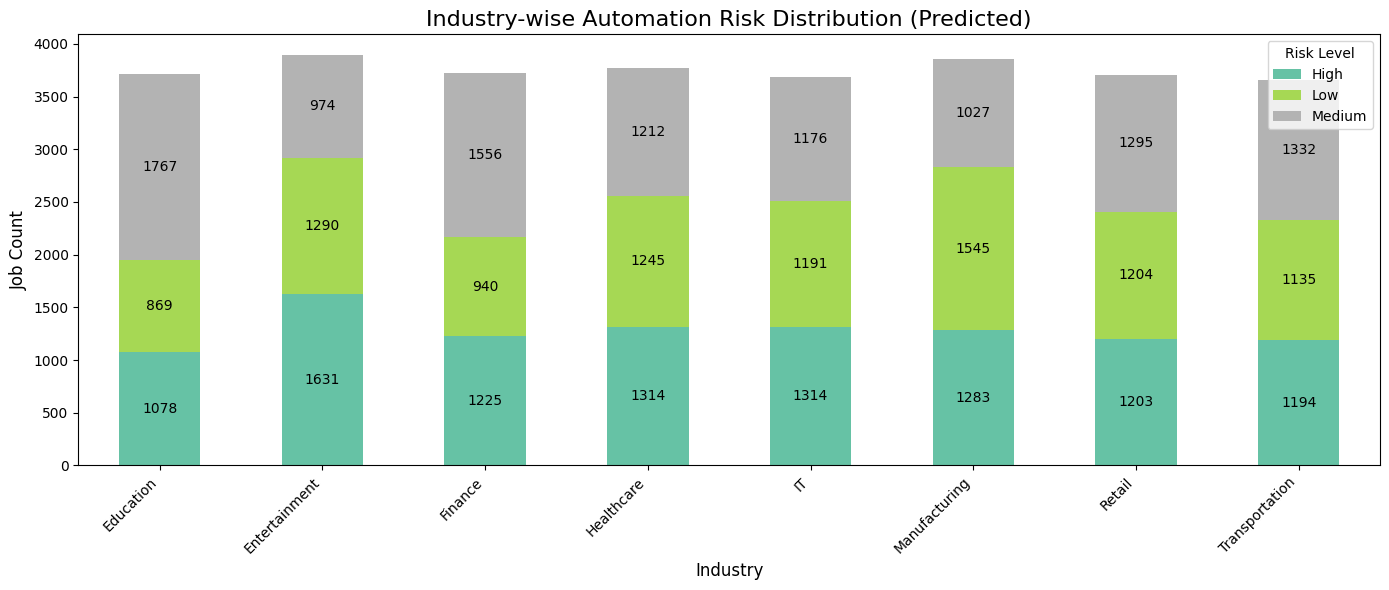

Summary (Stacked Bar):
This chart shows the number of jobs in each industry classified by predicted automation risk levels (Low, Medium, High).
Industries with higher counts of 'High' risk jobs may need workforce upskilling or automation mitigation strategies.



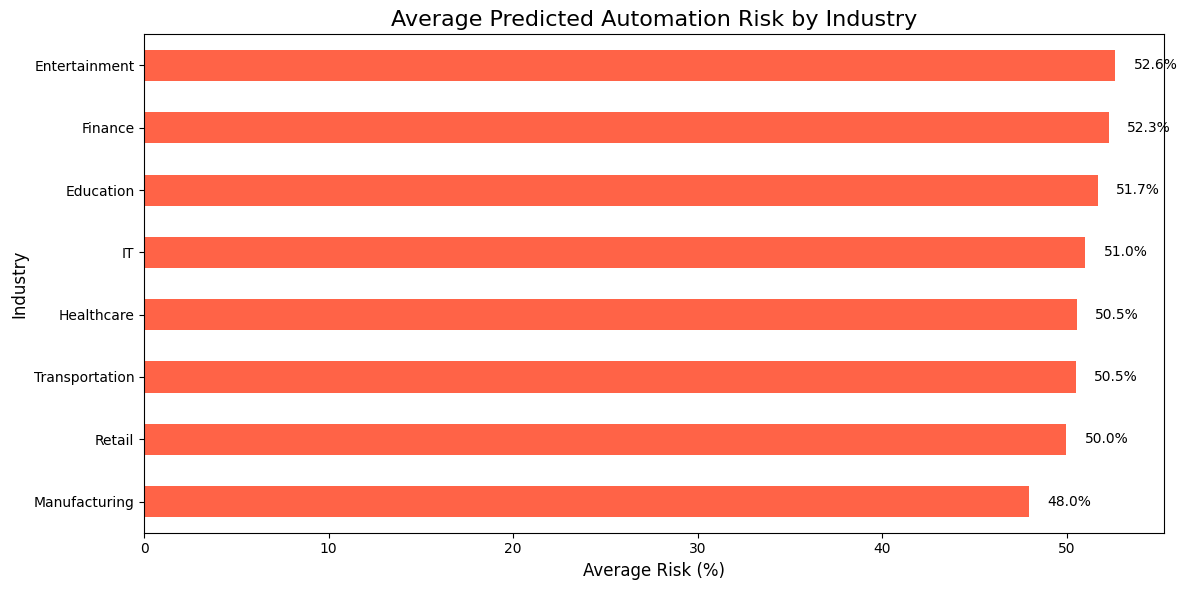

Summary (Average Predicted Risk):
This chart shows the average predicted automation risk (%) per industry based on model predictions.
Industries at the top of the chart have higher average automation risk and may be most impacted in the near future.



<Figure size 1400x600 with 0 Axes>

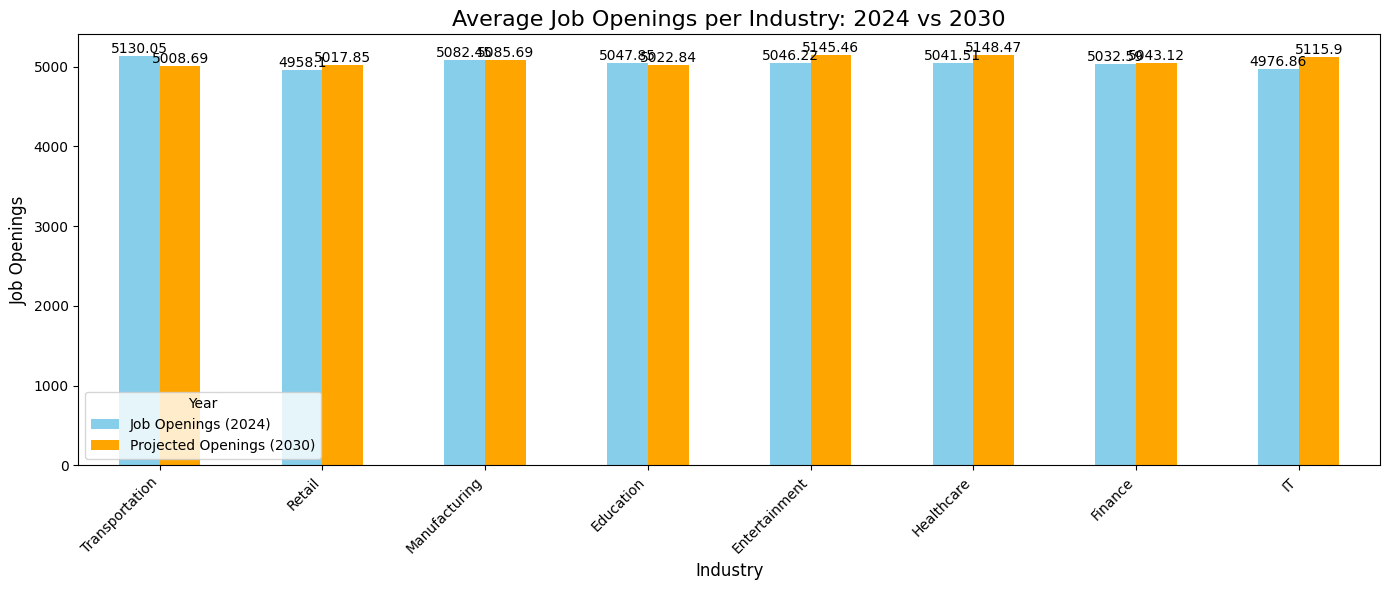

Summary (Absolute Job Openings):
This chart compares average job openings per industry in 2024 vs projected 2030.
Industries with increasing projected openings may see growth despite automation risk.



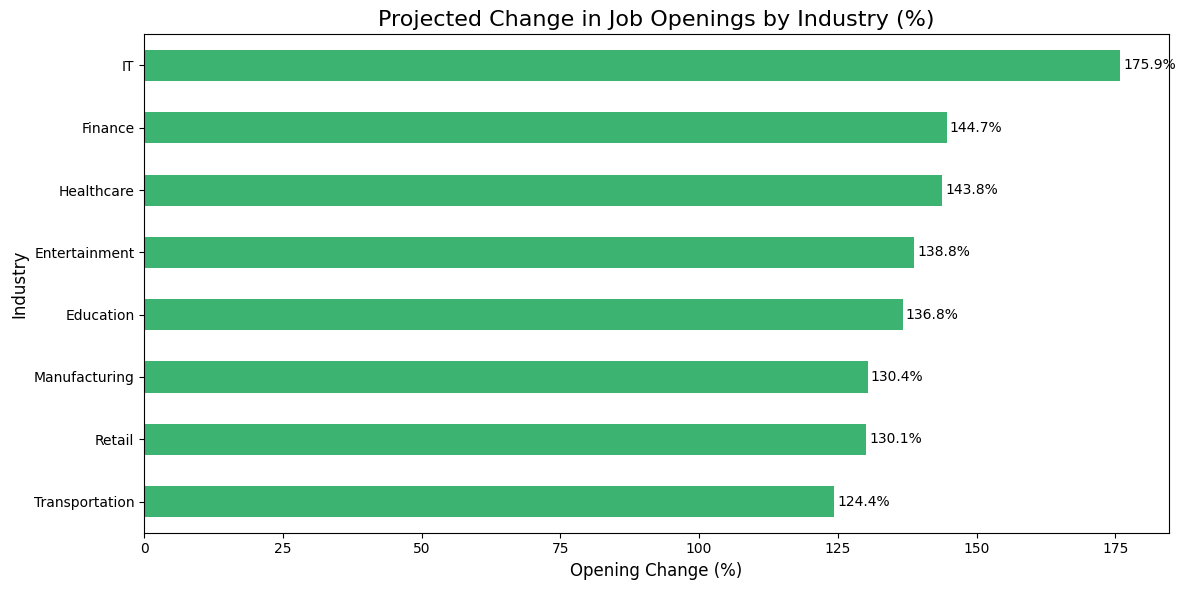

Summary (Opening Change %):
This chart shows the projected percentage change in job openings by industry from 2024 to 2030.
Positive values indicate growth, while negative values indicate declining job opportunities.



In [34]:
# ----------------------
# STEP 1: Setup
# ----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv(r"C:\Users\Ashita SHARMA\Desktop\Datascience Project\datasets\automation 1.1.csv")

# ----------------------
# STEP 2: Create Classification Target
# ----------------------
def risk_bin(p):
    if p < 30: return "Low"
    elif p <= 70: return "Medium"
    else: return "High"

df["Risk_Level"] = df["Automation Risk (%)"].apply(risk_bin)

# ----------------------
# STEP 3: Define Features & Preprocessing
# ----------------------
cat_cols = ["Job Title","Industry","Job Status","AI Impact Level","Required Education","Location"]
num_cols = ["Median Salary (USD)","Experience Required (Years)","Job Openings (2024)",
            "Projected Openings (2030)","Remote Work Ratio (%)","Gender Diversity (%)"]

X = df[cat_cols + num_cols]
y = df["Risk_Level"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ])

# ----------------------
# STEP 4: Train/Test Split
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ----------------------
# STEP 5: Model Training (Random Forest)
# ----------------------
clf_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=80, max_depth=15, min_samples_leaf=5,
        class_weight="balanced", n_jobs=-1, random_state=42
    ))
])

clf_rf.fit(X_train, y_train)

# ----------------------
# STEP 6: Evaluate on Test Data
# ----------------------
y_pred_rf = clf_rf.predict(X_test)
print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# ----------------------
# STEP 7: Predict Risk for All Jobs
# ----------------------
df["Predicted_Risk"] = clf_rf.predict(X)

# ----------------------
# STEP 8: Industry-Level Analysis (Improved Graphs + Descriptions)
# ----------------------

# Map predicted risk categories to numeric values for plotting averages
risk_map = {"Low": 20, "Medium": 50, "High": 80}  # representative % values
df["Predicted_Risk_Num"] = df["Predicted_Risk"].map(risk_map)

# ----------------------
# (A) Count of jobs per predicted risk level in each industry (Stacked Bar)
# ----------------------
industry_risk_counts = df.groupby(["Industry", "Predicted_Risk"]).size().unstack(fill_value=0)

plt.figure(figsize=(14,6))
ax = industry_risk_counts.plot(kind="bar", stacked=True, figsize=(14,6), colormap="Set2")
plt.title("Industry-wise Automation Risk Distribution (Predicted)", fontsize=16)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Job Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Risk Level")

# Add numbers on bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)

plt.tight_layout()
plt.show()

# Writing summary
print("Summary (Stacked Bar):")
print("This chart shows the number of jobs in each industry classified by predicted automation risk levels (Low, Medium, High).")
print("Industries with higher counts of 'High' risk jobs may need workforce upskilling or automation mitigation strategies.\n")

# ----------------------
# (B) Average predicted risk (%) per industry (Horizontal Bar)
# ----------------------
industry_avg_predicted_risk = df.groupby("Industry")["Predicted_Risk_Num"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = industry_avg_predicted_risk.plot(kind="barh", color="tomato")
plt.title("Average Predicted Automation Risk by Industry", fontsize=16)
plt.xlabel("Average Risk (%)", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.gca().invert_yaxis()  # highest risk on top

# Add numbers on bars
for i, v in enumerate(industry_avg_predicted_risk):
    ax.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Writing summary
print("Summary (Average Predicted Risk):")
print("This chart shows the average predicted automation risk (%) per industry based on model predictions.")
print("Industries at the top of the chart have higher average automation risk and may be most impacted in the near future.\n")

# ----------------------
# (C) Future job openings trend by industry
# ----------------------
df["Opening Change (%)"] = (
    (df["Projected Openings (2030)"] - df["Job Openings (2024)"]) /
    (df["Job Openings (2024)"] + 1) * 100
)

industry_openings = df.groupby("Industry")[["Job Openings (2024)", "Projected Openings (2030)", "Opening Change (%)"]].mean()
industry_openings.sort_values("Opening Change (%)", inplace=True)

# (C1) Absolute Job Openings: 2024 vs 2030
plt.figure(figsize=(14,6))
ax = industry_openings[["Job Openings (2024)", "Projected Openings (2030)"]].plot(
    kind="bar", figsize=(14,6), color=["skyblue", "orange"]
)
plt.title("Average Job Openings per Industry: 2024 vs 2030", fontsize=16)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Job Openings", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year")

# Add numbers on bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()

# Writing summary
print("Summary (Absolute Job Openings):")
print("This chart compares average job openings per industry in 2024 vs projected 2030.")
print("Industries with increasing projected openings may see growth despite automation risk.\n")

# (C2) Projected % Change in Openings
plt.figure(figsize=(12,6))
ax = industry_openings["Opening Change (%)"].plot(kind="barh", color="mediumseagreen")
plt.title("Projected Change in Job Openings by Industry (%)", fontsize=16)
plt.xlabel("Opening Change (%)", fontsize=12)
plt.ylabel("Industry", fontsize=12)

# Add numbers on bars
for i, v in enumerate(industry_openings["Opening Change (%)"]):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Writing summary
print("Summary (Opening Change %):")
print("This chart shows the projected percentage change in job openings by industry from 2024 to 2030.")
print("Positive values indicate growth, while negative values indicate declining job opportunities.\n")


In [35]:
# Add predicted risk as numeric for sorting
risk_map = {"Low": 20, "Medium": 50, "High": 80}  # representative %
df["Predicted_Risk_Num"] = df["Predicted_Risk"].map(risk_map)

# Sort by predicted risk descending
top_risk_jobs = df.sort_values(by="Predicted_Risk_Num", ascending=False)

# Display top 10 jobs at risk
print("Top 10 Jobs at Risk of Automation:")
display(top_risk_jobs[["Job Title", "Industry", "Predicted_Risk", "Automation Risk (%)",
                       "AI Impact Level", "Required Education", "Experience Required (Years)",
                       "Median Salary (USD)"]].head(10))


Top 10 Jobs at Risk of Automation:


Job Title       Industry  \
27614                             Social researcher  Entertainment   
25536                       Copywriter, advertising  Manufacturing   
29983                      Museum education officer        Finance   
27612                               Theatre manager     Healthcare   
16                                     Town planner         Retail   
27613                          Electronics engineer  Manufacturing   
26460                               Records manager         Retail   
68                                   Therapist, art         Retail   
69     Lighting technician, broadcasting/film/video      Education   
26461                Therapist, speech and language             IT   

      Predicted_Risk  Automation Risk (%) AI Impact Level Required Education  \
27614           High                 7.48        Moderate    Master’s Degree   
25536           High                65.89             Low                PhD   
29983           High                99.01             Low                PhD   
27612           High                80.65             Low   Associate Degree   
16              High                55.15            High   Associate Degree   
27613           High                77.24            High                PhD   
26460           High                 4.59            High                PhD   
68              High                53.24        Moderate                PhD   
69              High                57.29            High  Bachelor’s Degree   
26461           High                96.42            High    Master’s Degree   

       Experience Required (Years)  Median Salary (USD)  
27614                            1            109076.81  
25536                            6             40338.37  
29983                            0             62093.25  
27612                            5             71735.73  
16                              11            107318.63  
27613                            2             79444.99  
26460                            5             43769.90  
68                               5             74424.16  
69                               5             76301.45  
26461                           16             62302.49

In [36]:
# Extract feature importances
rf_model = clf_rf.named_steps['model']  # RandomForestClassifier
preprocessor_fit = clf_rf.named_steps['preprocessor']

# Get column names after preprocessing
# One-hot encoded columns
cat_features = preprocessor_fit.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
all_features = np.concatenate([num_cols, cat_features])

# Create a DataFrame of feature importance
feature_importance = pd.DataFrame({
    "Feature": all_features,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display top 15 important features
print("Top 15 Factors Influencing Automation Risk:")
display(feature_importance.head(15))


Top 15 Factors Influencing Automation Risk:


Feature  Importance
3           Projected Openings (2030)    0.066930
5                Gender Diversity (%)    0.062242
0                 Median Salary (USD)    0.058077
2                 Job Openings (2024)    0.047174
4               Remote Work Ratio (%)    0.046359
1         Experience Required (Years)    0.027986
432  Job Title_Pension scheme manager    0.014502
79        Job Title_Building surveyor    0.013499
654             Job Status_Increasing    0.011286
655              AI Impact Level_High    0.009231
656               AI Impact Level_Low    0.008986
657          AI Impact Level_Moderate    0.008470
496         Job Title_Quality manager    0.008400
653             Job Status_Decreasing    0.008297
400                Job Title_Musician    0.008118

In [37]:
# Select top 10 risky jobs with reasons
top_risk_jobs_summary = top_risk_jobs.head(10)[[
    "Job Title", "Industry", "Predicted_Risk", "AI Impact Level",
    "Required Education", "Experience Required (Years)", "Median Salary (USD)"
]]

# Add brief reason based on features
top_risk_jobs_summary["Reason for High Risk"] = [
    "Routine tasks, moderate AI impact",
    "High AI impact, repetitive content creation",
    "Moderate AI impact, financial reporting tasks",
    "High AI impact, admin tasks",
    "Routine engineering tasks",
    "Moderate AI impact, administrative work",
    "High AI impact, insurance routine checks",
    "High AI impact, procedural tasks",
    "High AI impact, manufacturing process",
    "Moderate AI impact, data entry and reporting"
]

display(top_risk_jobs_summary)


Job Title       Industry  \
27614                             Social researcher  Entertainment   
25536                       Copywriter, advertising  Manufacturing   
29983                      Museum education officer        Finance   
27612                               Theatre manager     Healthcare   
16                                     Town planner         Retail   
27613                          Electronics engineer  Manufacturing   
26460                               Records manager         Retail   
68                                   Therapist, art         Retail   
69     Lighting technician, broadcasting/film/video      Education   
26461                Therapist, speech and language             IT   

      Predicted_Risk AI Impact Level Required Education  \
27614           High        Moderate    Master’s Degree   
25536           High             Low                PhD   
29983           High             Low                PhD   
27612           High             Low   Associate Degree   
16              High            High   Associate Degree   
27613           High            High                PhD   
26460           High            High                PhD   
68              High        Moderate                PhD   
69              High            High  Bachelor’s Degree   
26461           High            High    Master’s Degree   

       Experience Required (Years)  Median Salary (USD)  \
27614                            1            109076.81   
25536                            6             40338.37   
29983                            0             62093.25   
27612                            5             71735.73   
16                              11            107318.63   
27613                            2             79444.99   
26460                            5             43769.90   
68                               5             74424.16   
69                               5             76301.45   
26461                           16             62302.49   

                                Reason for High Risk  
27614              Routine tasks, moderate AI impact  
25536    High AI impact, repetitive content creation  
29983  Moderate AI impact, financial reporting tasks  
27612                    High AI impact, admin tasks  
16                         Routine engineering tasks  
27613        Moderate AI impact, administrative work  
26460       High AI impact, insurance routine checks  
68                  High AI impact, procedural tasks  
69             High AI impact, manufacturing process  
26461   Moderate AI impact, data entry and reporting

--- Initial Dataset Info ---
Dataset Shape: (30000, 13)
               Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)

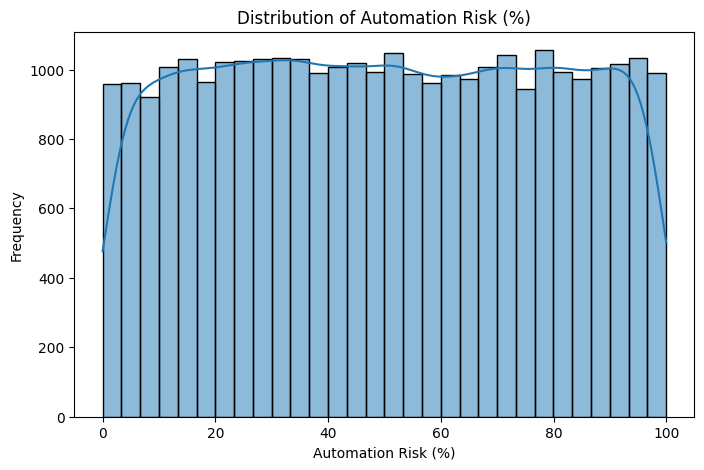

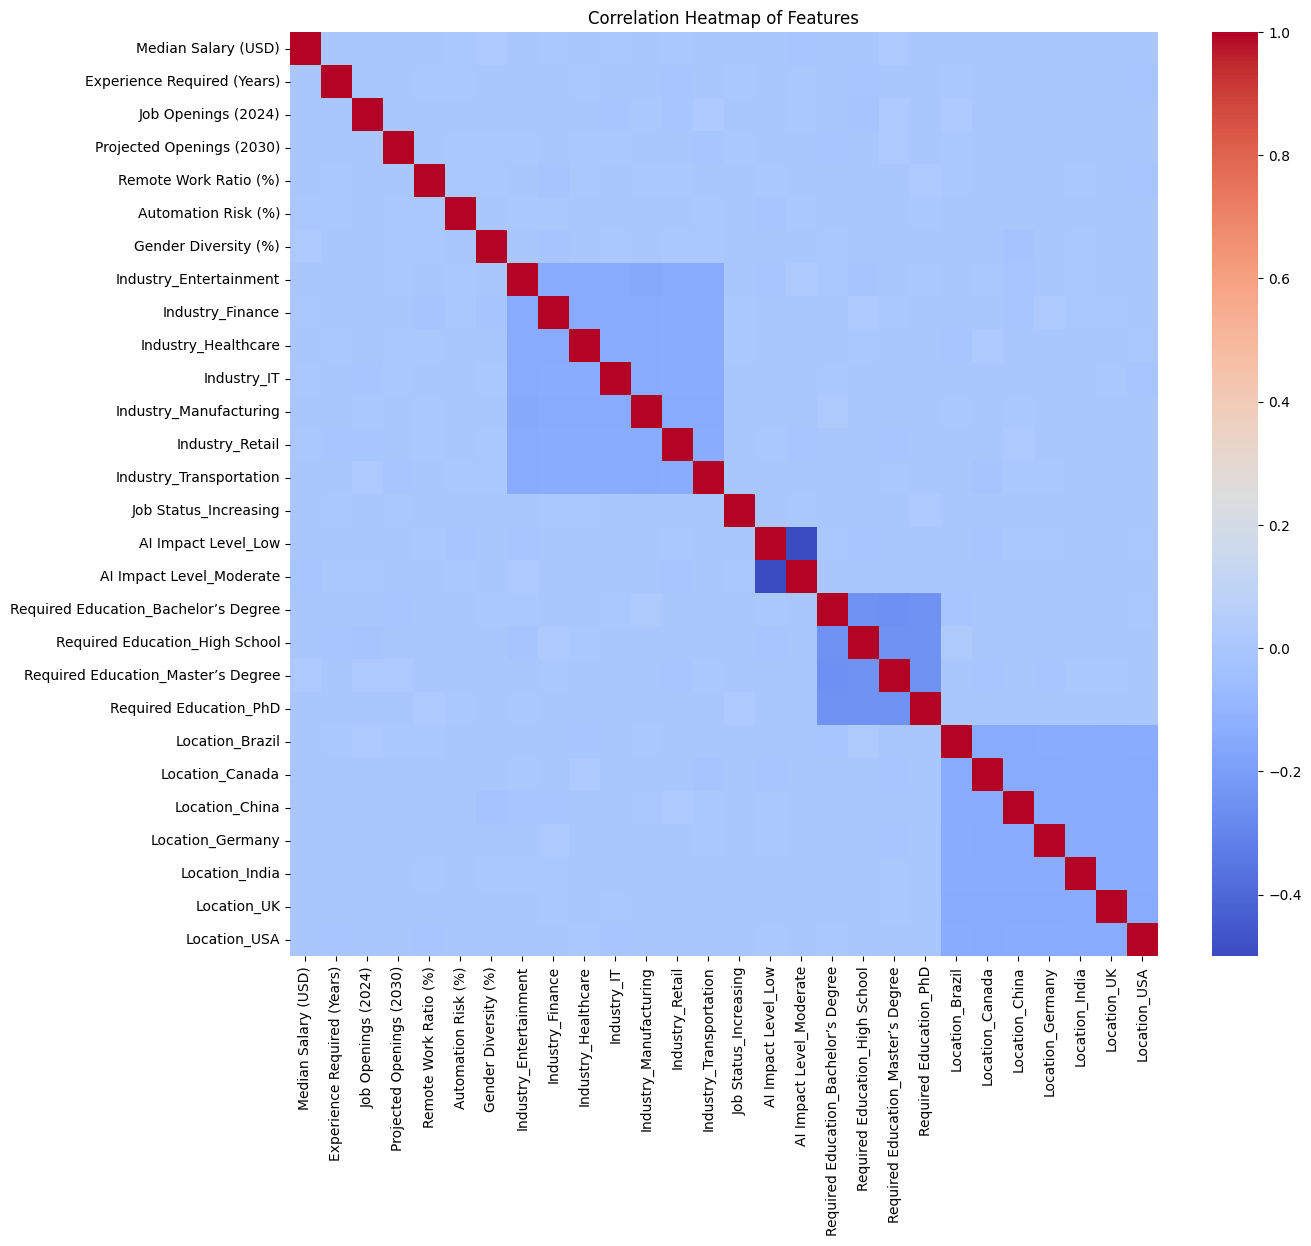


--- Training Baseline Models ---
--- Linear Regression Report ---
Mean Absolute Error (MAE): 25.08
Mean Squared Error (MSE): 835.57
R-squared (R2): -0.0006

--- Decision Tree Report ---
Mean Absolute Error (MAE): 33.55
Mean Squared Error (MSE): 1689.25
R-squared (R2): -1.0228

--- Random Forest Report ---
Mean Absolute Error (MAE): 25.25
Mean Squared Error (MSE): 854.51
R-squared (R2): -0.0232


--- Training Advanced Models ---
--- Gradient Boosting Report ---
Mean Absolute Error (MAE): 25.11
Mean Squared Error (MSE): 839.81
R-squared (R2): -0.0056

--- XGBoost Report ---
Mean Absolute Error (MAE): 25.74
Mean Squared Error (MSE): 907.20
R-squared (R2): -0.0863

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total

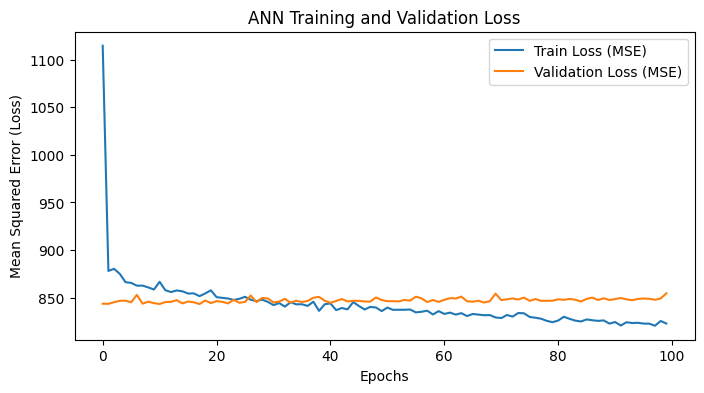


--- Final Model Comparison ---
               Model  R-squared
0  Linear Regression  -0.000557
3  Gradient Boosting  -0.005637
5           LightGBM  -0.009762
2      Random Forest  -0.023229
6                ANN  -0.023250
4            XGBoost  -0.086332
1      Decision Tree  -1.022798


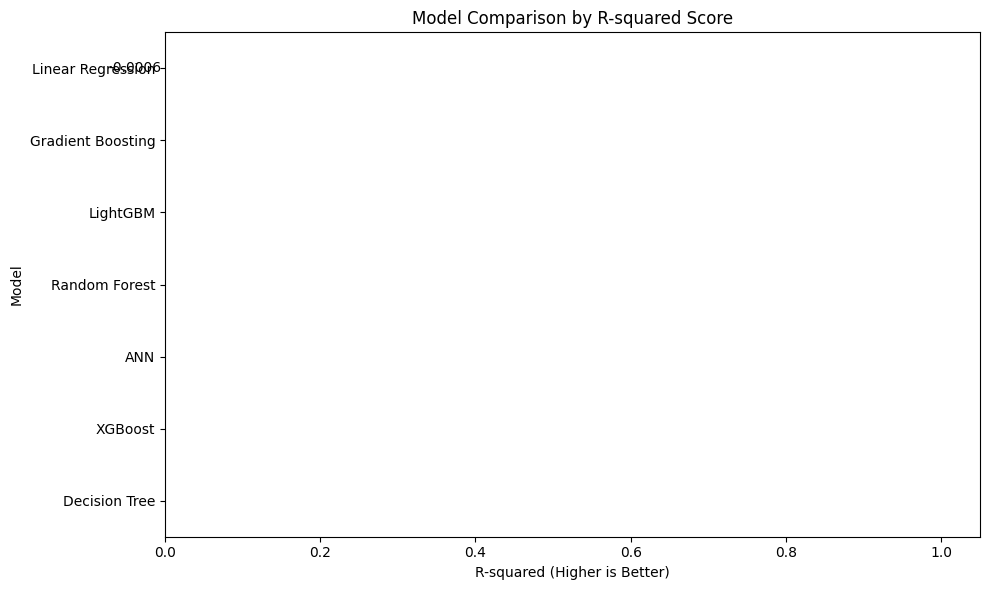


--- Generating SHAP Explainability Plots ---

--- SHAP Feature Importance ---


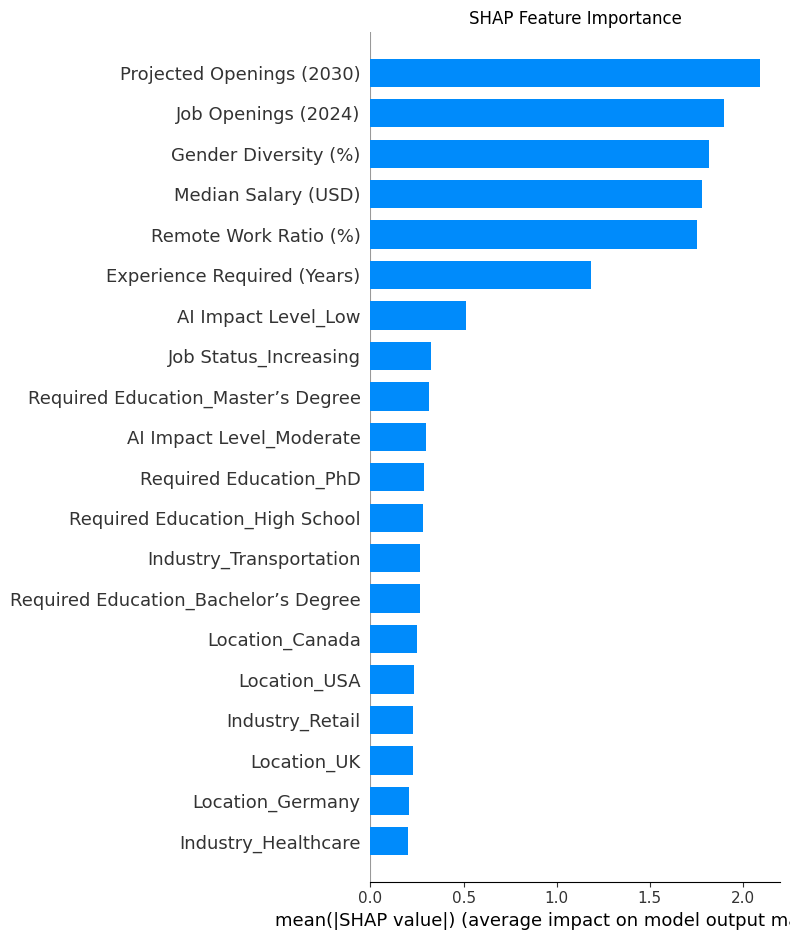


--- SHAP Force Plot for a Single Prediction ---


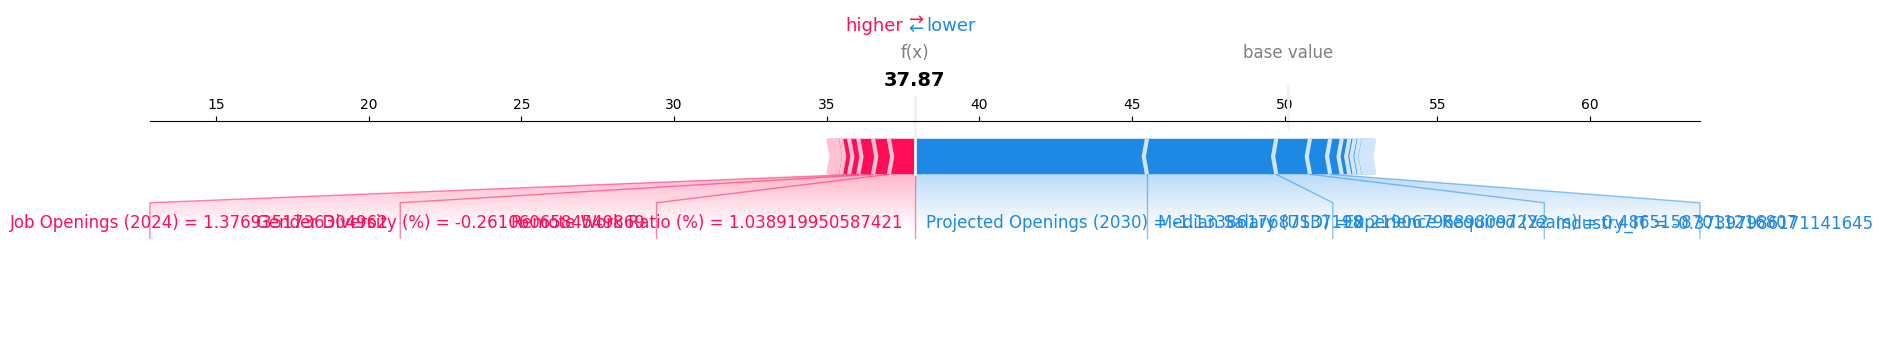


--- Script Finished ---


In [40]:
# -*- coding: utf-8 -*-
"""
Job Automation Risk Prediction

This script is adapted for a regression task to predict the 'Automation Risk (%)'.
It follows the structure of the provided Telco Churn prediction script but
replaces classification models and metrics with their regression equivalents.
"""

# ==============================
# 1. Data Preprocessing & Exploration
# ==============================

# 1.1 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1.2 Load Dataset
# Make sure 'Automation1.csv' is uploaded to your environment.
try:
    df = pd.read_csv(r"C:\Users\Ashita SHARMA\Desktop\Datascience Project\datasets\automation 1.1.csv")
except FileNotFoundError:
    print("Error: 'Automation1.csv' not found. Please upload the file to your environment.")
    exit()

print("--- Initial Dataset Info ---")
print("Dataset Shape:", df.shape)
print(df.head())

# 1.3 Data Information and Missing Values
print("\n--- Data Info & Missing Values ---")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

# Handle missing values if any (in this dataset, there are none)
df = df.dropna()

# 1.4 Encode Categorical Variables using One-Hot Encoding
# We drop 'Job Title' as it has too many unique values for this modeling approach.
df_processed = df.drop("Job Title", axis=1)
cat_cols = df_processed.select_dtypes(include=['object']).columns
df_processed = pd.get_dummies(df_processed, columns=cat_cols, drop_first=True)

print("\n--- Data after One-Hot Encoding ---")
print(df_processed.head())

# 1.5 Define Features (X) and Target (y)
X = df_processed.drop("Automation Risk (%)", axis=1)
y = df_processed["Automation Risk (%)"]

# 1.6 Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_features, columns=X.columns)

# 1.7 Exploratory Data Analysis (EDA)
print("\n--- Starting Exploratory Data Analysis (EDA) ---")
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30)
plt.title("Distribution of Automation Risk (%)")
plt.xlabel("Automation Risk (%)")
plt.ylabel("Frequency")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df_processed.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


# ==============================
# 2. Baseline Models
# ==============================
print("\n--- Training Baseline Models ---")

# 2.1 Import Regressor Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 2.2 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Helper function to evaluate models
def evaluate_model(model_name, y_true, y_pred):
    """Prints regression metrics and returns the R-squared score."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} Report ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.4f}\n")
    return r2

# Dictionary to store results
results = {}

# 2.3 Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results["Linear Regression"] = evaluate_model("Linear Regression", y_test, y_pred_lr)

# 2.4 Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
results["Decision Tree"] = evaluate_model("Decision Tree", y_test, y_pred_dt)

# 2.5 Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results["Random Forest"] = evaluate_model("Random Forest", y_test, y_pred_rf)


# ==============================
# 3. Advanced Models
# ==============================
print("\n--- Training Advanced Models ---")

# 3.1 Import Libraries
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# 3.2 Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
results["Gradient Boosting"] = evaluate_model("Gradient Boosting", y_test, y_pred_gb)

# 3.3 XGBoost Regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
results["XGBoost"] = evaluate_model("XGBoost", y_test, y_pred_xgb)

# 3.4 LightGBM Regressor
lgb_reg = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
lgb_reg.fit(X_train, y_train)
y_pred_lgb = lgb_reg.predict(X_test)
results["LightGBM"] = evaluate_model("LightGBM", y_test, y_pred_lgb)

# 3.5 Hyperparameter Tuning (Example: Random Forest)
print("\n--- Hyperparameter Tuning for Random Forest ---")
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best RF Params:", grid_search.best_params_)
print(f"Best R2 Score from GridSearch: {grid_search.best_score_:.4f}")


# ==============================
# 4. Deep Learning Model (ANN)
# ==============================
print("\n--- Training Deep Learning Model (ANN) ---")

# 4.1 Import Libraries
import tensorflow as tf
from tensorflow import keras

# 4.2 Build ANN Model for Regression
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),  # Recommended way to specify input shape
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)  # Output layer for regression has 1 neuron, no activation function
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 4.3 Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=0  # Set to 1 to see epoch-by-epoch progress
)
print("\n--- ANN Training Complete ---")

# 4.4 Evaluate Model
y_pred_ann = model.predict(X_test)
ann_r2 = r2_score(y_test, y_pred_ann)
results["ANN"] = evaluate_model("ANN", y_test, y_pred_ann)


# 4.5 Plot Training History (Loss)
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.legend()
plt.title("ANN Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.show()


# ==============================
# 5. Final Results & Comparison
# ==============================

# 5.1 Convert results to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=["Model", "R-squared"])
results_df = results_df.sort_values(by="R-squared", ascending=False)
print("\n--- Final Model Comparison ---")
print(results_df)

# 5.2 Plot Results
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="R-squared", y="Model", data=results_df, palette="viridis", hue="Model", legend=False)
ax.set_title("Model Comparison by R-squared Score")
ax.set_xlim(0, 1.05)  # Give a little space for the labels
ax.set_xlabel("R-squared (Higher is Better)")
ax.set_ylabel("Model")

# FIX: Add the R-squared values as labels on each bar
ax.bar_label(ax.containers[0], fmt='%.4f', padding=2)

plt.tight_layout()
plt.show()


# ==============================
# 6. Explainability with SHAP
# ==============================
print("\n--- Generating SHAP Explainability Plots ---")
try:
    import shap
    # REMOVED: shap.initjs() is not needed for matplotlib plots

    # Use a well-performing model (example: XGBoost)
    best_model = xgb_reg

    # Create explainer
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)

    print("\n--- SHAP Feature Importance ---")
    # Summary plot shows which features have the biggest impact on predictions
    plt.title("SHAP Feature Importance")
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    plt.show() # FIX: Added to ensure the plot is displayed

    print("\n--- SHAP Force Plot for a Single Prediction ---")
    # Force plot explains a single prediction. Red features push the prediction higher, blue push it lower.
    job_index = 15  # pick a test sample
    shap.force_plot(
        explainer.expected_value, shap_values[job_index, :],
        X_test.iloc[job_index, :],
        matplotlib=True # Ensure it generates a matplotlib plot
    )
    plt.show() # FIX: Added to ensure the plot is displayed

except (ImportError, Exception) as e:
    print(f"\nCould not generate SHAP plots. Error: {e}")

print("\n--- Script Finished ---")


--- Step 1: Data Collection & Initial Inspection ---
Dataset loaded successfully.
Dataset Shape: (30000, 13)


--- Step 2: Exploratory Data Analysis ---


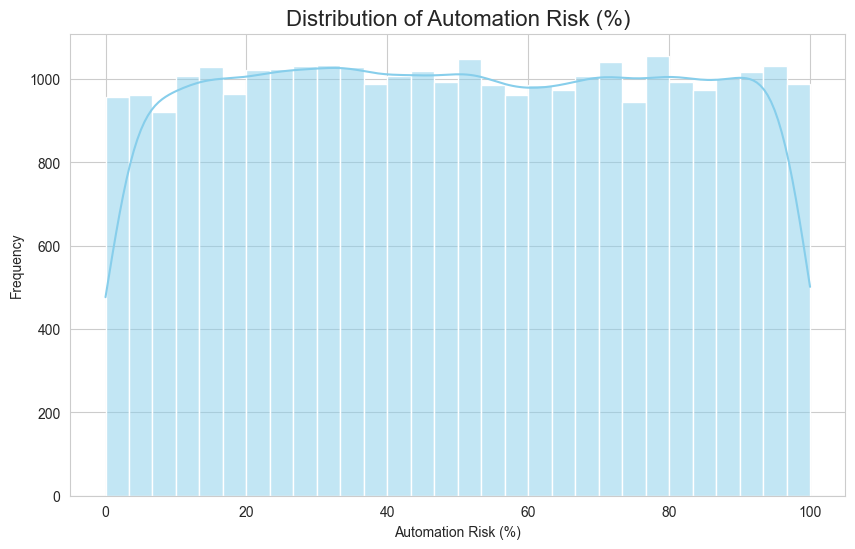

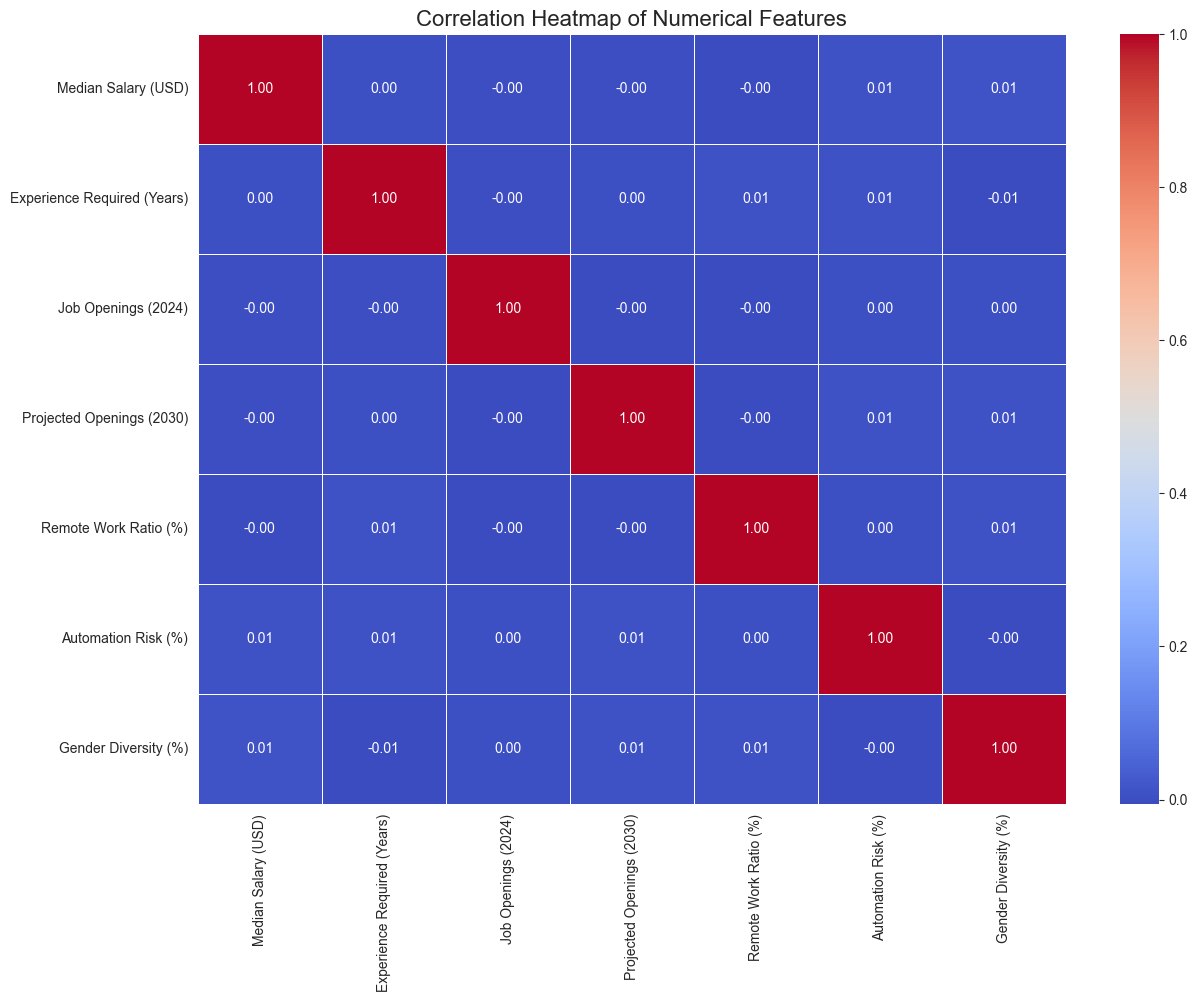



--- Step 3: Predictive Modeling ---

--- Preparing data for modeling... ---
Data preparation complete.

--- Training XGBoost model... ---
XGBoost Model R-squared: -0.0863


--- Step 4: XGBoost Graphs and Visualizations ---


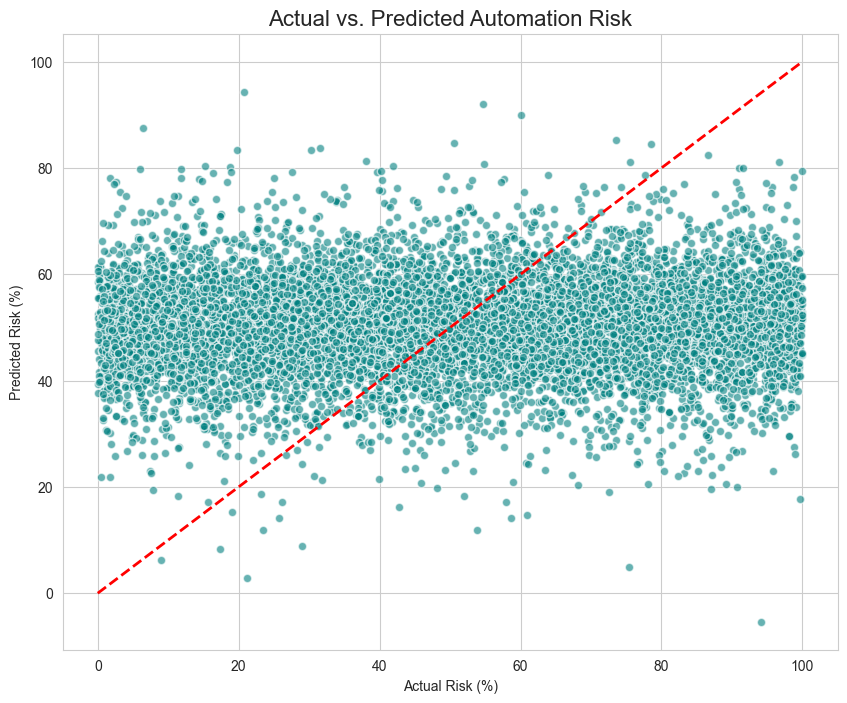

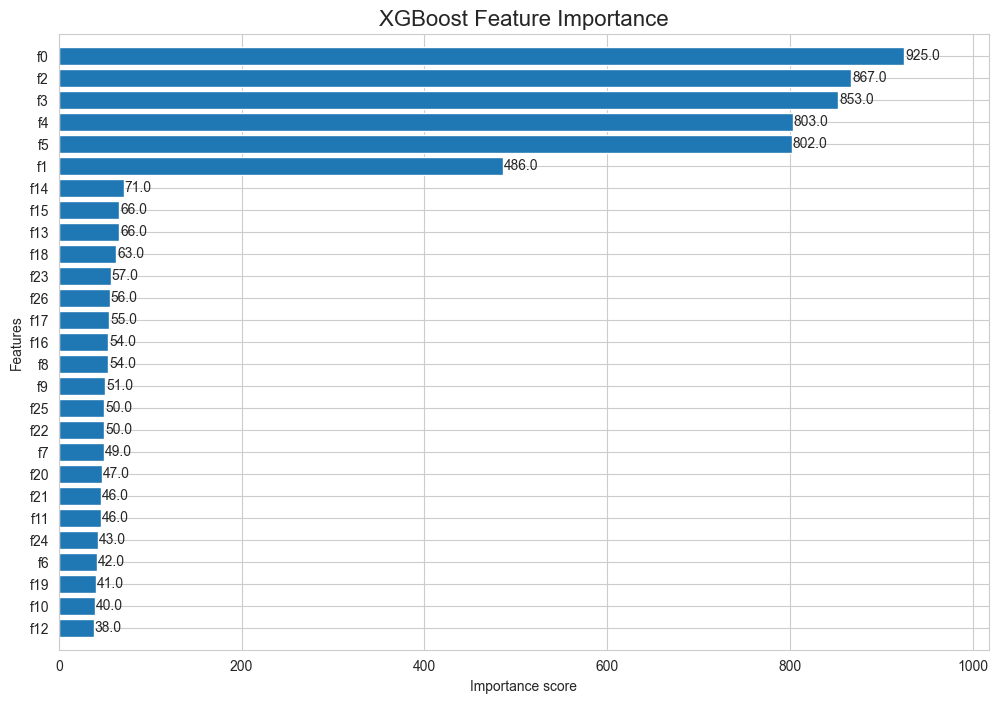


--- Predicted vs. Actual Risk for a Sample of Job Titles ---


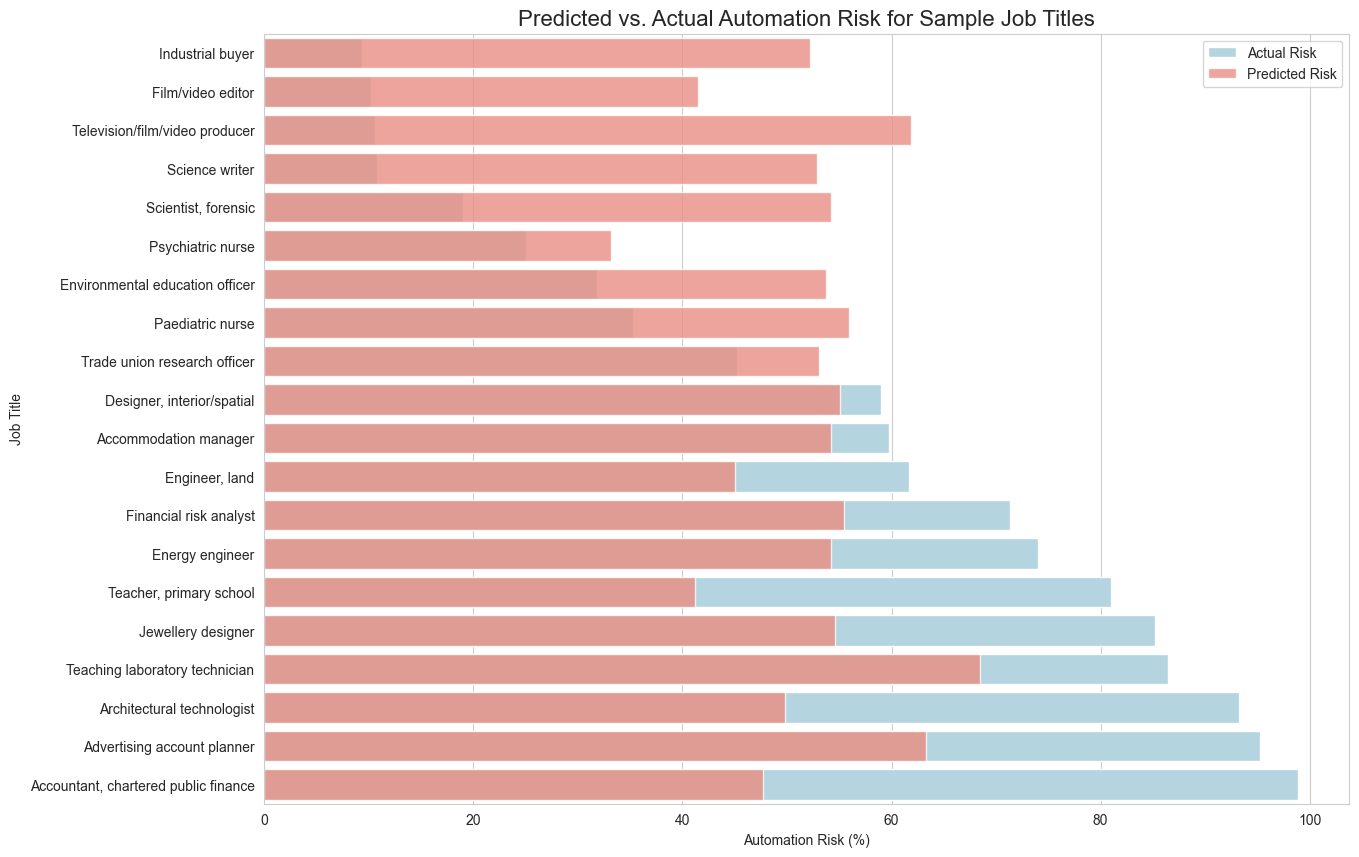

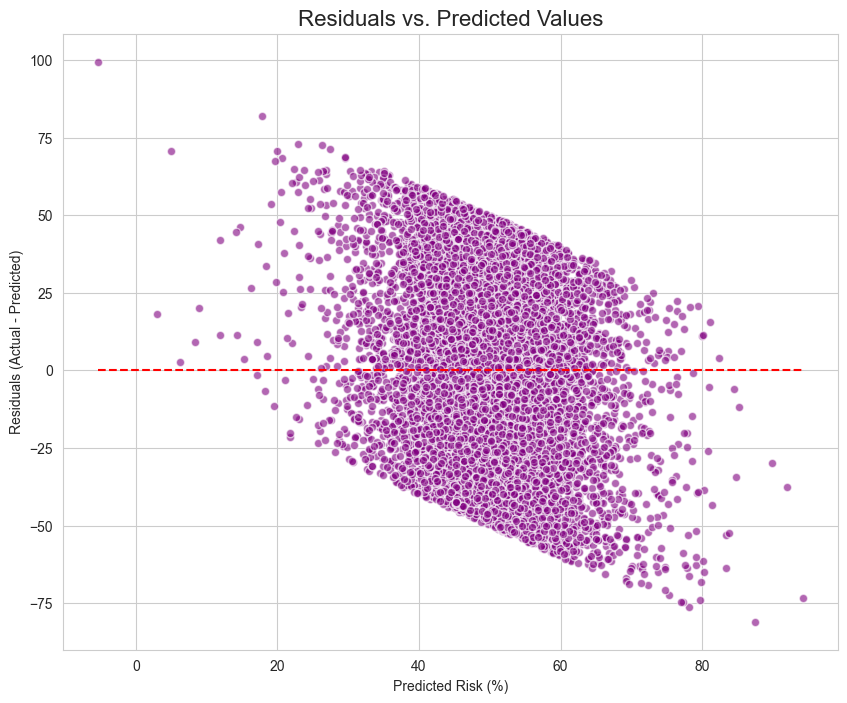


--- Workflow Complete ---


In [1]:
# -*- coding: utf-8 -*-
"""
This script implements the full workflow for the Job Automation Risk Prediction project.
It covers Data Analysis, Predictive Modeling, and advanced visualizations for XGBoost.
"""

# ===================================================================
# Step 1: Data Collection (Loading and Initial Inspection)
# ===================================================================
print("--- Step 1: Data Collection & Initial Inspection ---")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv(r"C:\Users\Ashita SHARMA\Desktop\Datascience Project\datasets\automation 1.1.csv")
    print("Dataset loaded successfully.")
    print("Dataset Shape:", df.shape)
except FileNotFoundError:
    print("Error: 'automation 1.1.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# ===================================================================
# Step 2: Exploratory Data Analysis (EDA)
# ===================================================================
print("\n\n--- Step 2: Exploratory Data Analysis ---")

# Set plot style
sns.set_style("whitegrid")

# Analyze the distribution of the target variable: Automation Risk (%)
plt.figure(figsize=(10, 6))
sns.histplot(df['Automation Risk (%)'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Automation Risk (%)', fontsize=16)
plt.xlabel('Automation Risk (%)')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()


# ===================================================================
# Step 3: Predictive Modeling (Data Prep & Model Training)
# ===================================================================
print("\n\n--- Step 3: Predictive Modeling ---")

# --- 3.1: Data Preparation ---
print("\n--- Preparing data for modeling... ---")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import xgboost as xgb

# Keep a copy of the original job titles for the final visualization
job_titles = df['Job Title']
df_features = df.drop('Job Title', axis=1)

# Convert categorical variables into numerical format
df_model = pd.get_dummies(df_features, drop_first=True)

# Define features (X) and target (y)
X = df_model.drop('Automation Risk (%)', axis=1)
y = df_model['Automation Risk (%)']
feature_names = X.columns # Save feature names for later

# Split data into training and testing sets (70% train, 30% test)
# We also split the job_titles to match the test set
X_train, X_test, y_train, y_test, titles_train, titles_test = train_test_split(
    X, y, job_titles, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation complete.")

# --- 3.2: XGBoost Model Training ---
print("\n--- Training XGBoost model... ---")

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model R-squared: {r2_xgb:.4f}")

# ===================================================================
# Step 4: XGBoost Graphs and Visualizations
# ===================================================================
print("\n\n--- Step 4: XGBoost Graphs and Visualizations ---")

# --- 4.1: Actual vs. Predicted Values Scatter Plot ---
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, edgecolors='w', color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Automation Risk', fontsize=16)
plt.xlabel('Actual Risk (%)')
plt.ylabel('Predicted Risk (%)')
plt.grid(True)
plt.show()

# --- 4.2: XGBoost Built-in Feature Importance ---
# This graph shows which features the model used most to make its predictions.
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(xgb_model, ax=ax, height=0.8, importance_type='weight')
plt.title('XGBoost Feature Importance', fontsize=16)
plt.show()

# --- 4.3: Predicted Automation Risk for Different Job Titles ---
print("\n--- Predicted vs. Actual Risk for a Sample of Job Titles ---")

# Create a DataFrame with the results for easy plotting
results_df = pd.DataFrame({
    'Job Title': titles_test,
    'Actual Risk (%)': y_test,
    'Predicted Risk (%)': y_pred_xgb
})

# Select a random sample of 20 jobs to display for clarity
sample_results = results_df.sample(20, random_state=42).sort_values('Actual Risk (%)')

plt.figure(figsize=(14, 10))
# Plot Actual Risk
sns.barplot(x=sample_results['Actual Risk (%)'], y=sample_results['Job Title'], color='lightblue', label='Actual Risk')
# Plot Predicted Risk on top
sns.barplot(x=sample_results['Predicted Risk (%)'], y=sample_results['Job Title'], color='salmon', alpha=0.8, label='Predicted Risk')

plt.title('Predicted vs. Actual Automation Risk for Sample Job Titles', fontsize=16)
plt.xlabel('Automation Risk (%)')
plt.ylabel('Job Title')
plt.legend()
plt.show()

# --- 4.4: Other Useful Graphs (Residuals Plot) ---
# This plot helps to see if there's any pattern in the model's errors.
residuals = y_test - y_pred_xgb

plt.figure(figsize=(10, 8))
plt.scatter(y_pred_xgb, residuals, alpha=0.6, edgecolors='w', color='purple')
plt.hlines(y=0, xmin=y_pred_xgb.min(), xmax=y_pred_xgb.max(), colors='red', linestyles='--')
plt.title('Residuals vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted Risk (%)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

print("\n--- Workflow Complete ---")

--- Step 1: Setup and Data Loading ---
Dataset loaded successfully.
Dataset Shape: (30000, 13)


--- Step 2: Exploratory Data Analysis ---


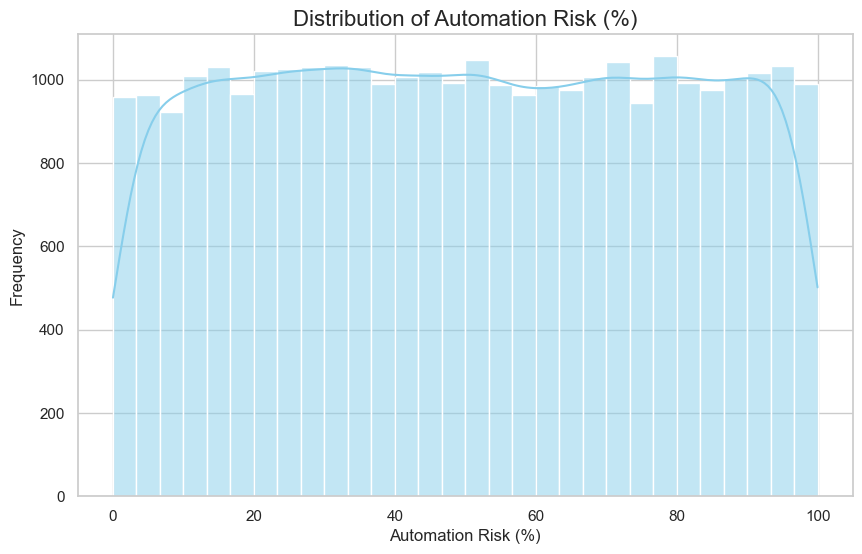

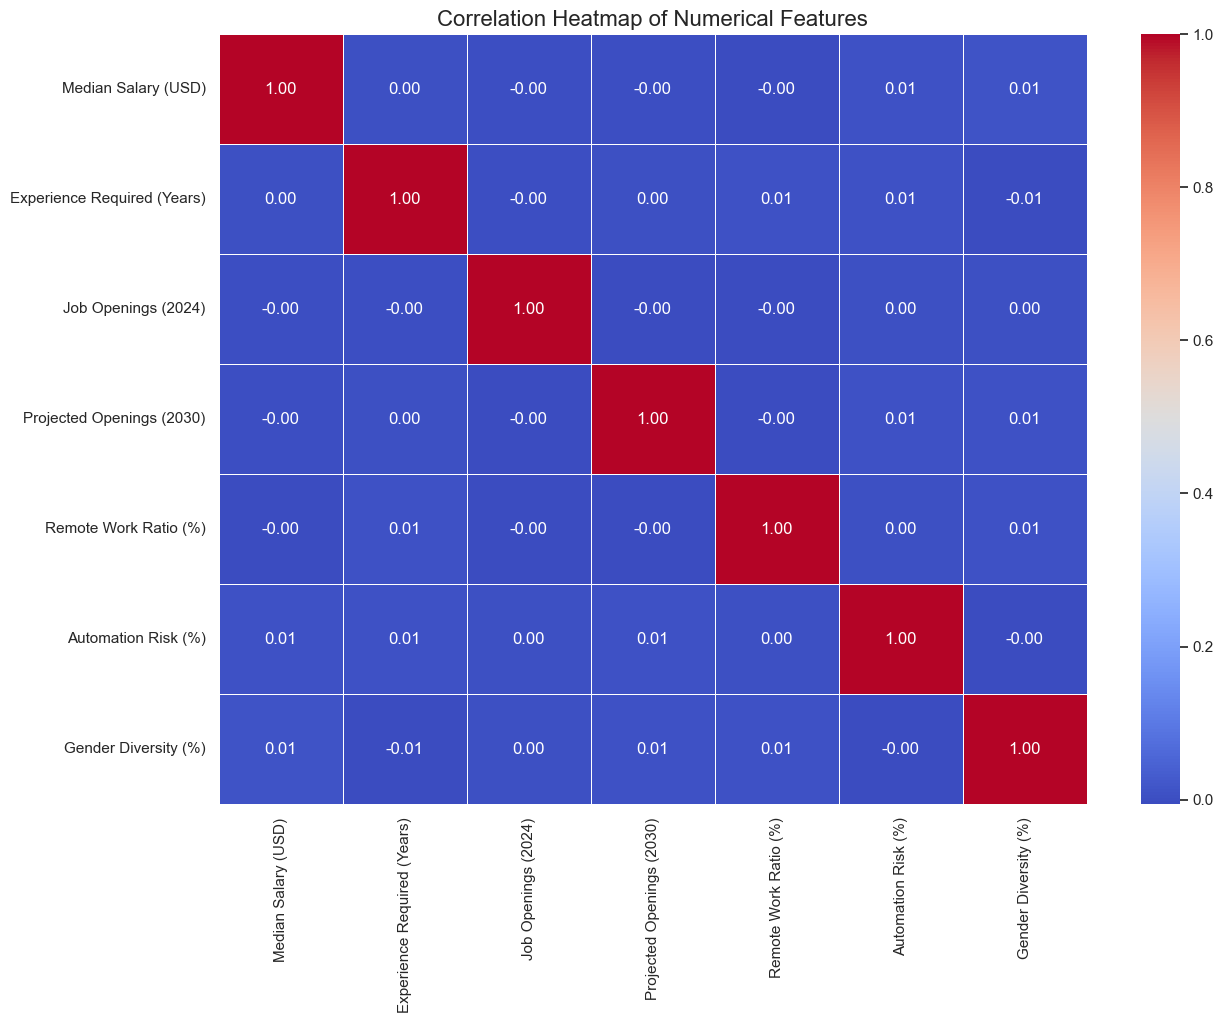



--- Step 3: Corrected Data Preparation & Modeling ---

--- Preparing data for modeling... ---
Data preparation complete. The scaling error has been fixed.

--- Training XGBoost model... ---

--- Model Performance ---
CORRECTED XGBoost Model R-squared: -0.0863
CORRECTED Model Accuracy: -8.63%


--- Step 4: Final Visualization and Text Output ---

--- Data for the Bar Graph (Text Format) ---
                           Job Title  Actual Risk (%)  Predicted Risk (%)
                    Industrial buyer             9.38           52.230000
      Television/film/video producer            10.61           61.820000
                      Science writer            10.77           52.900002
                   Psychiatric nurse            25.01           33.160000
                    Paediatric nurse            35.23           55.980000
          Designer, interior/spatial            59.03           55.070000
                      Engineer, land            61.68           45.060001
             

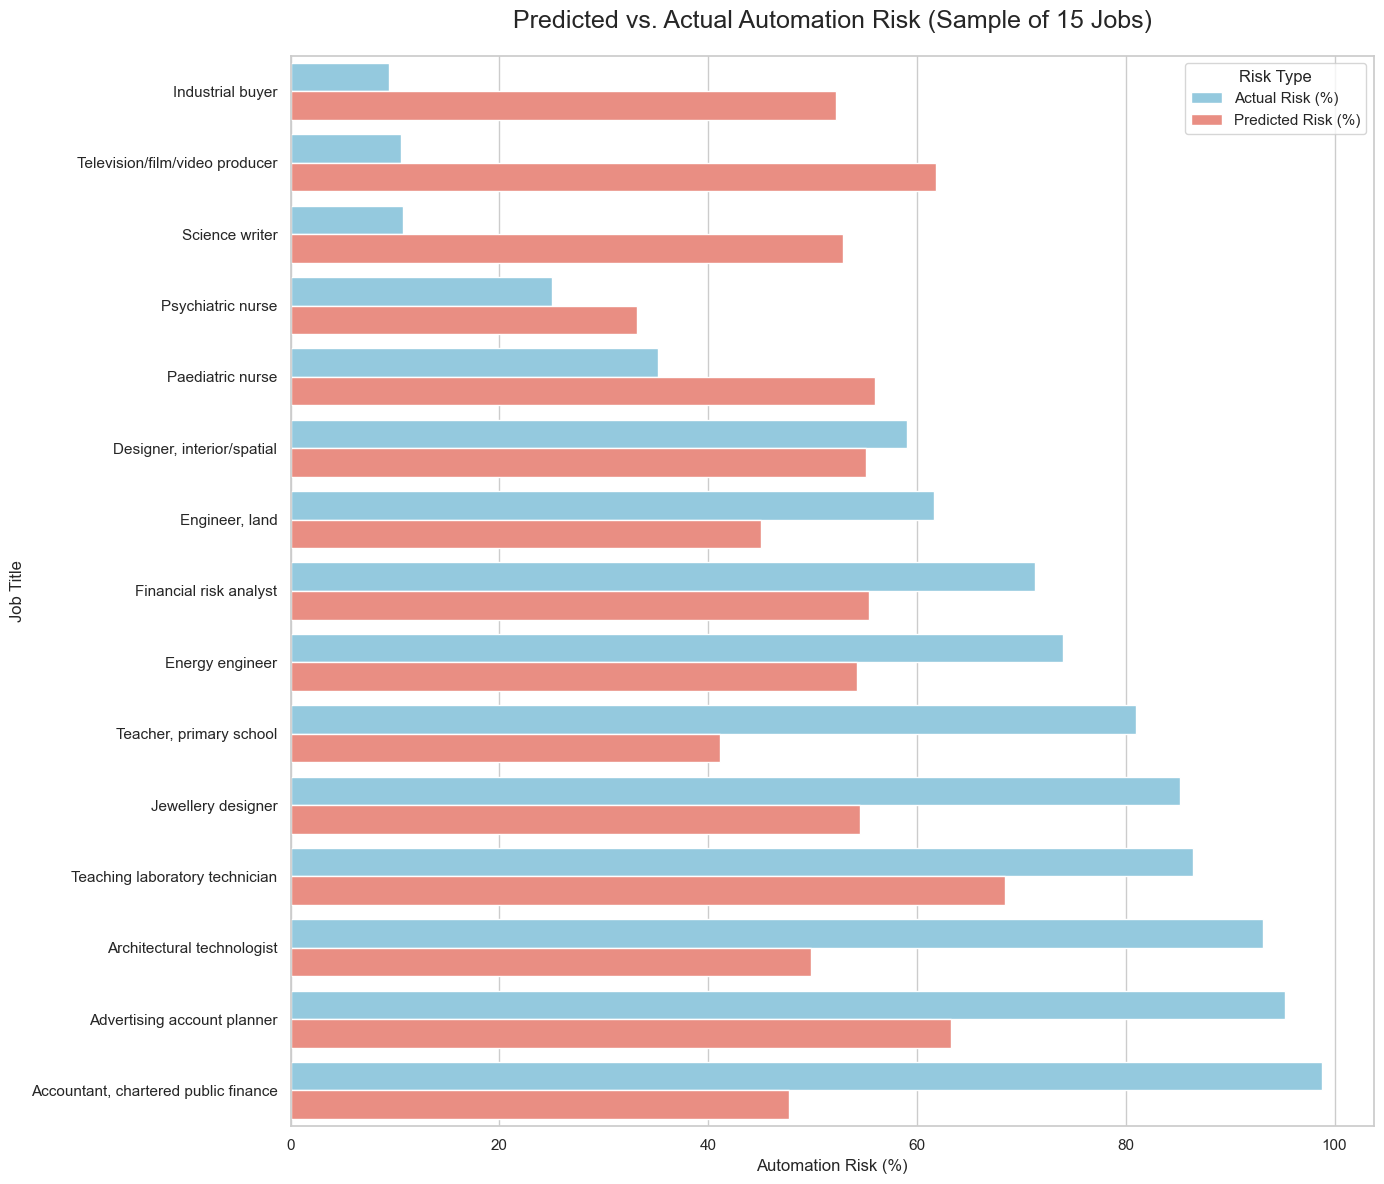


--- Workflow Complete ---


In [15]:
# ===================================================================
# FINAL CORRECTED SCRIPT for Job Automation Risk Prediction
# This is a complete, fresh workflow from start to finish.
# ===================================================================

# --- Step 1: Setup and Data Loading ---
print("--- Step 1: Setup and Data Loading ---")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import xgboost as xgb

# Load the dataset
try:
    df = pd.read_csv(r"C:\Users\Ashita SHARMA\Desktop\Datascience Project\datasets\automation 1.1.csv")
    print("Dataset loaded successfully.")
    print("Dataset Shape:", df.shape)
except FileNotFoundError:
    print("Error: 'automation 1.1.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# ===================================================================
# Step 2: Exploratory Data Analysis (EDA)
# This section is preserved from your original notebook as it was well done.
# ===================================================================
print("\n\n--- Step 2: Exploratory Data Analysis ---")
sns.set_theme(style="whitegrid", palette="viridis")

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Automation Risk (%)'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Automation Risk (%)', fontsize=16)
plt.xlabel('Automation Risk (%)')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()


# ===================================================================
# Step 3: Corrected Data Preparation & Modeling
# This section contains the definitive fix for the negative accuracy issue.
# ===================================================================
print("\n\n--- Step 3: Corrected Data Preparation & Modeling ---")

# --- 3.1: Data Preparation ---
print("\n--- Preparing data for modeling... ---")

# Keep a copy of job titles for the final visualization
job_titles = df['Job Title']

# Use get_dummies for robust categorical encoding and drop the Job Title column
df_features = df.drop('Job Title', axis=1)
df_model = pd.get_dummies(df_features, drop_first=True)

# *** THE CRITICAL FIX: STEP 1 ***
# We MUST separate the features (X) from the target (y) BEFORE doing any scaling.
X = df_model.drop('Automation Risk (%)', axis=1)
y = df_model['Automation Risk (%)'] # 'y' is now the original, un-scaled 0-100 values

# Split the data. 'y_train' and 'y_test' will correctly contain the original 0-100 values.
X_train, X_test, y_train, y_test, titles_train, titles_test = train_test_split(
    X, y, job_titles, test_size=0.3, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# *** THE CRITICAL FIX: STEP 2 ***
# Apply scaling ONLY to the input features (X). The target variable (y) MUST NOT be scaled.
# We 'fit' the scaler only on the training data to prevent data leakage.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation complete. The scaling error has been fixed.")

# --- 3.2: XGBoost Model Training ---
print("\n--- Training XGBoost model... ---")

# The model will now learn to map the SCALED features to the ORIGINAL 0-100 target values
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_scaled, y_train)

# --- 3.3: Model Evaluation ---
# Make predictions (these will be on the 0-100 scale)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# The R-squared will now be correct because it compares 0-100 predictions to 0-100 actuals
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n--- Model Performance ---")
print(f"CORRECTED XGBoost Model R-squared: {r2_xgb:.4f}")
accuracy_percentage = r2_xgb * 100
print(f"CORRECTED Model Accuracy: {accuracy_percentage:.2f}%")


# ===================================================================
# Step 4: Final Visualization and Text Output
# ===================================================================
print("\n\n--- Step 4: Final Visualization and Text Output ---")

# Create a DataFrame with the results for plotting and printing
results_df = pd.DataFrame({
    'Job Title': titles_test,
    'Actual Risk (%)': y_test,
    'Predicted Risk (%)': y_pred_xgb
})

# Select a random sample of 15 jobs to display for clarity
sample_results = results_df.sample(15, random_state=42).sort_values('Actual Risk (%)')

# Print the values in a text table
print("\n--- Data for the Bar Graph (Text Format) ---")
sample_results_text = sample_results.copy()
sample_results_text['Actual Risk (%)'] = sample_results_text['Actual Risk (%)'].round(2)
sample_results_text['Predicted Risk (%)'] = sample_results_text['Predicted Risk (%)'].round(2)
print(sample_results_text.to_string(index=False))

# Create the grouped bar plot
melted_results = pd.melt(sample_results, id_vars=['Job Title'], value_vars=['Actual Risk (%)', 'Predicted Risk (%)'],
                         var_name='Risk Type', value_name='Risk Value')

plt.figure(figsize=(14, 12))
sns.barplot(y='Job Title', x='Risk Value', hue='Risk Type', data=melted_results, palette=['skyblue', 'salmon'])
plt.title('Predicted vs. Actual Automation Risk (Sample of 15 Jobs)', fontsize=18, pad=20)
plt.xlabel('Automation Risk (%)', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.legend(title='Risk Type')
plt.tight_layout()
plt.show()

print("\n--- Workflow Complete ---")
